In [1]:
# Import required packages for this project.
from pathlib import Path

import math
import statistics

import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates

import seaborn as sns

from sklearn import preprocessing

import scipy.stats
from scipy import stats
from scipy.stats import anderson
from scipy.stats import ttest_ind

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.outliers_influence import variance_inflation_factor

from IPython.display import Image
Image("img/Model_Comparison.png")

%matplotlib inline


In [2]:
# Established path to access data for this assignment.
DATA = Path("C:\\Users\\rcc_0\\OneDrive\\Documents\\ANA 620\\Assignment_3")

In [3]:
# Load the required data for the first part of assigment.
Wages_df = pd.read_csv(DATA / 'HW_3_SLIDLogWagesClean.csv')

# View some initial records.
Wages_df.head()

wages  education  age     sex language  logwages
0  10.56       15.0   40    Male  English  2.357073
1  11.00       13.2   19    Male  English  2.397895
2  17.76       14.0   46    Male    Other  2.876949
3  14.00       16.0   50  Female  English  2.639057
4   8.20       15.0   31    Male  English  2.104134

In [4]:
# Generate dataframe dimensions.
Wages_df.shape

(3987, 6)

In [5]:
# Generate variable data types.
Wages_df.dtypes

wages        float64
education    float64
age            int64
sex           object
language      object
logwages     float64
dtype: object

In [6]:
# Generate number of missing values.
Wages_df.isna().sum()

wages        0
education    0
age          0
sex          0
language     0
logwages     0
dtype: int64

Specific Evaluation and Preparation of Dataset Variables

In [7]:
# Evaluate the 'sex' categorical variable.
Wages_df['sex'].value_counts()

sex
Female    2001
Male      1986
Name: count, dtype: int64

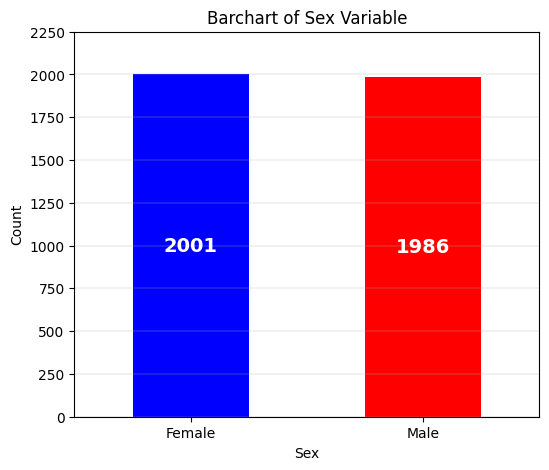

In [8]:
# Barchart for the 'sex' categorical variable.
dfg = Wages_df['sex'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Sex Variable', ylabel='Count', xlabel='Sex', color= ['b','r'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,2251,step=250))
plt.grid(axis='y', linewidth=0.25)
plt.show()

In [9]:
# Evaluate the 'language' categorical variable.
Wages_df['language'].value_counts()

language
English    3244
Other       484
French      259
Name: count, dtype: int64

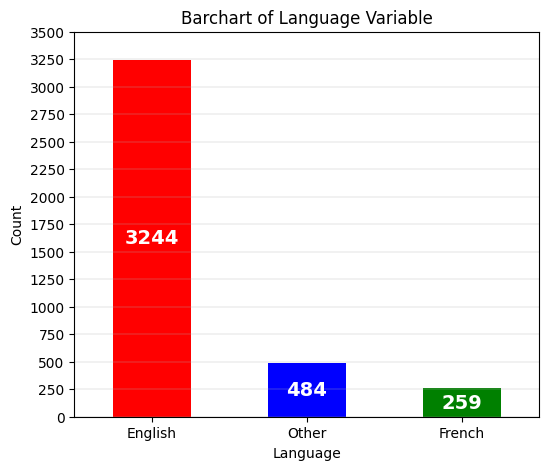

In [10]:
# Barchart for the 'language' categorical variable.
dfg = Wages_df['language'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Language Variable', ylabel='Count', xlabel='Language', color= ['r','b', 'g'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,3501,step=250))
plt.grid(axis='y', linewidth=0.25)
plt.show()

In [11]:
Wages_df.describe().map('{:,.3f}'.format)

wages  education        age   logwages
count  3,987.000  3,987.000  3,987.000  3,987.000
mean      15.539     13.337     37.098      2.619
std        7.869      3.038     12.137      0.503
min        2.300      0.000     16.000      0.833
25%        9.250     12.000     28.000      2.225
50%       14.130     13.000     36.000      2.648
75%       19.720     15.100     46.000      2.982
max       49.920     20.000     69.000      3.910

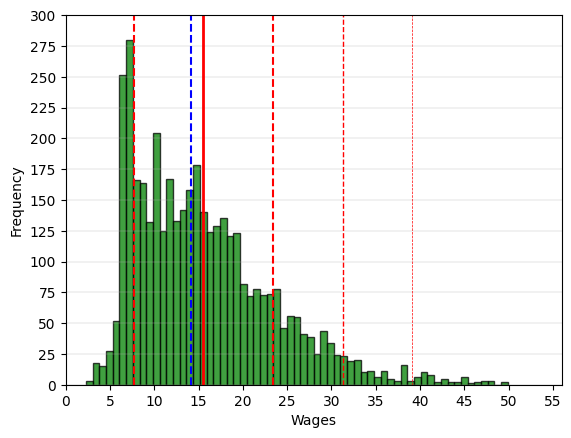

In [12]:
# Histogram for the 'wages' continuous variable.
plt.hist(Wages_df['wages'], bins = 63, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Wages')
plt.ylabel('Frequency')
plt.xlim(0, 56)
plt.xticks(np.arange(0,56,step=5))
plt.yticks(np.arange(0,301,step=25))

mean_value = Wages_df['wages'].mean()
median_value = Wages_df['wages'].median()
std_value = Wages_df['wages'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

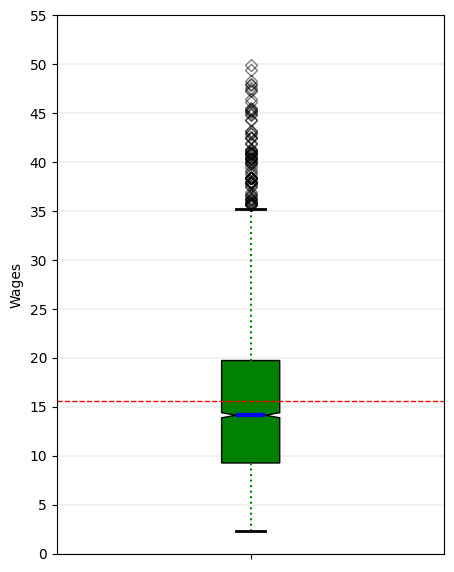

In [13]:
# Boxplot for the 'wages' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Wages_df['wages'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Wages')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,56,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [14]:
# 'wages' Anderson-Darling Normality Test
result = anderson(Wages_df['wages'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 70.761
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


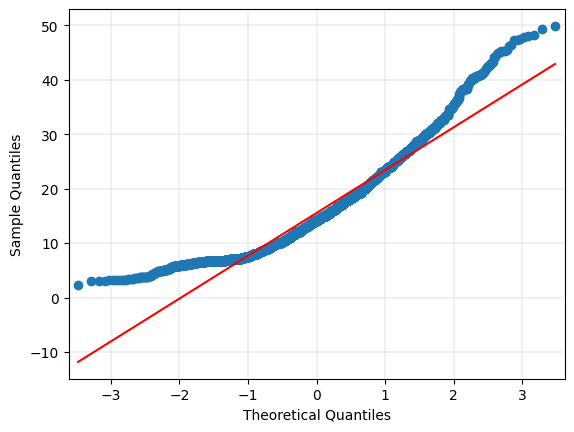

In [15]:
# 'wages' QQ plot
qqplot(Wages_df['wages'], line='s')
plt.grid(linewidth=0.25)
plt.show()

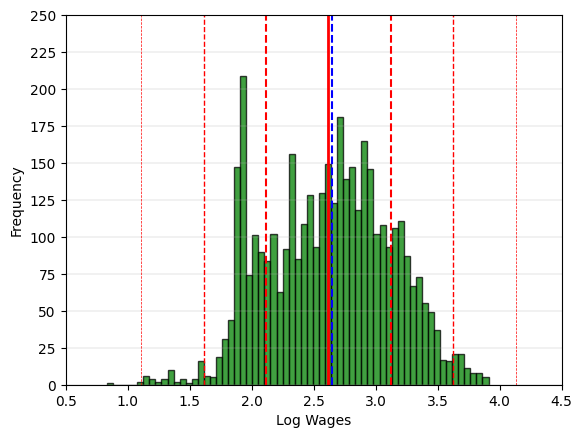

In [16]:
# Histogram for the 'logwages' continuous transformed variable.
plt.hist(Wages_df['logwages'], bins = 63, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Log Wages')
plt.ylabel('Frequency')
plt.xticks(np.arange(0.5,4.51,step=0.50))
plt.yticks(np.arange(0,251,step=25))

mean_value = Wages_df['logwages'].mean()
median_value = Wages_df['logwages'].median()
std_value = Wages_df['logwages'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

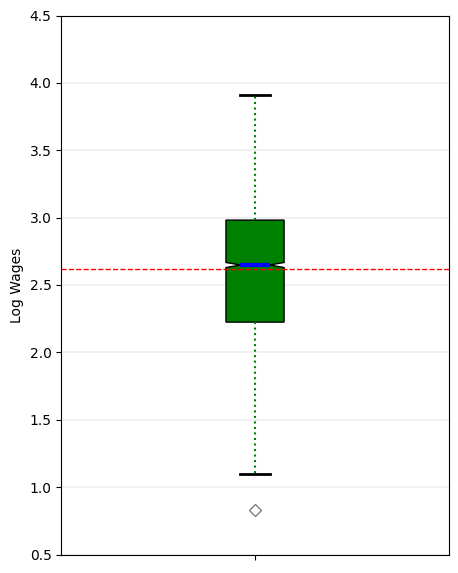

In [17]:
# Boxplot for the 'logwages' continuous transformed variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Wages_df['logwages'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Log Wages')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0.5,4.51,step=0.50)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [18]:
# 'logwages' Anderson-Darling Normality Test
result = anderson(Wages_df['logwages'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 14.847
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


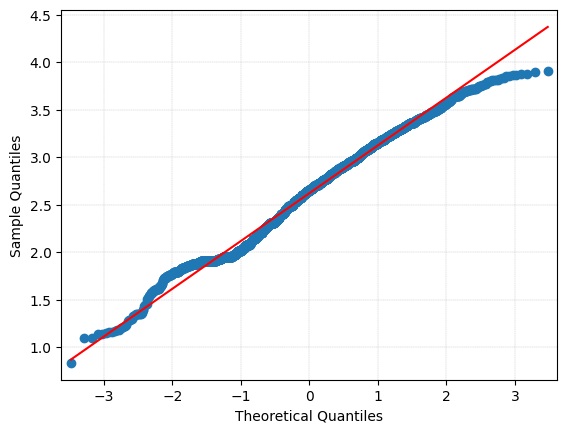

In [19]:
# 'logwages' QQ plot
qqplot(Wages_df['logwages'], line='s')
plt.grid(linestyle='dashed', linewidth=0.25)
plt.show()

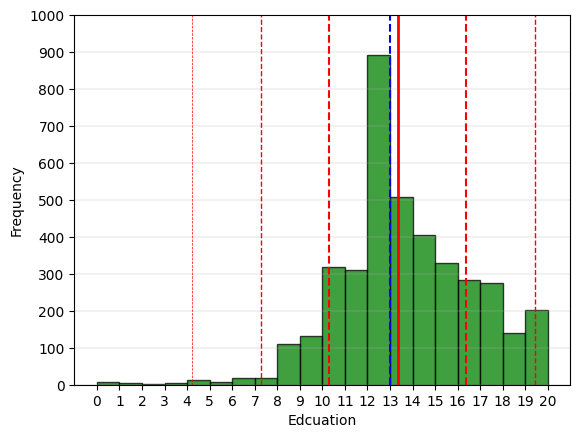

In [20]:
# Histogram for the 'education' continuous variable.
plt.hist(Wages_df['education'], bins = 20, alpha = 0.75, color = 'green', edgecolor = 'black', align='mid')
plt.xlabel('Edcuation')
plt.ylabel('Frequency')
plt.xlim(-1,21)
plt.xticks(np.arange(0,21,step=1))
plt.yticks(np.arange(0,1001,step=100))

mean_value = Wages_df['education'].mean()
median_value = Wages_df['education'].median()
std_value = Wages_df['education'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

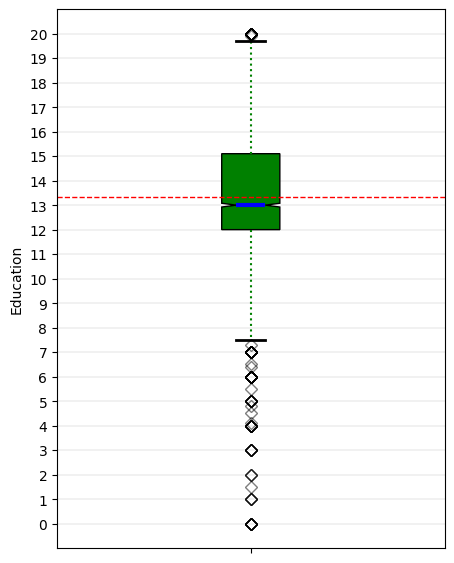

In [21]:
# Boxplot for the 'education' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Wages_df['education'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Education')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,21,step=1)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [22]:
# 'education' Anderson-Darling Normality Test
result = anderson(Wages_df['education'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 26.697
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


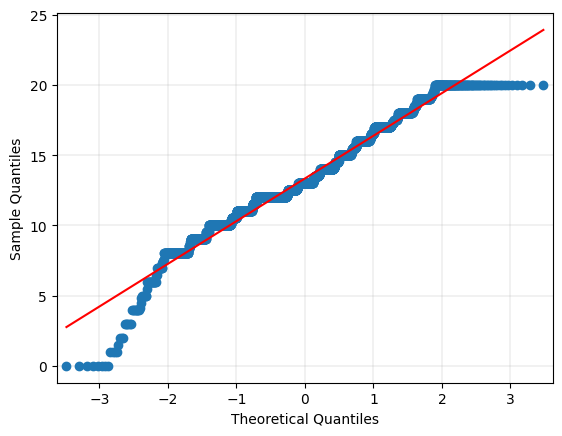

In [23]:
# 'education' QQ plot
qqplot(Wages_df['education'], line='s')
plt.grid(linewidth=0.25)
plt.show()

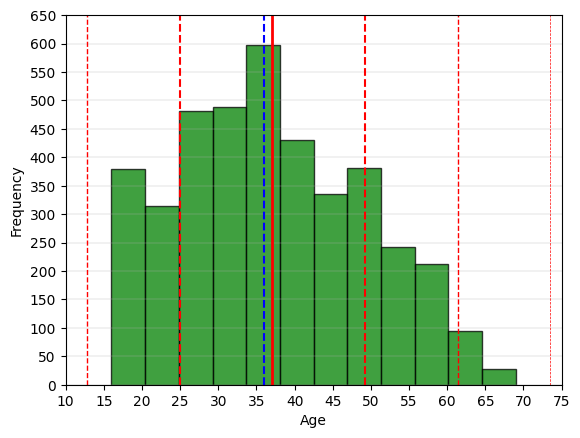

In [24]:
# Histogram for the 'age' continuous variable.
plt.hist(Wages_df['age'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(10,75)
plt.xticks(np.arange(10,76,step=5))
plt.yticks(np.arange(0,651,step=50))

mean_value = Wages_df['age'].mean()
median_value = Wages_df['age'].median()
std_value = Wages_df['age'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

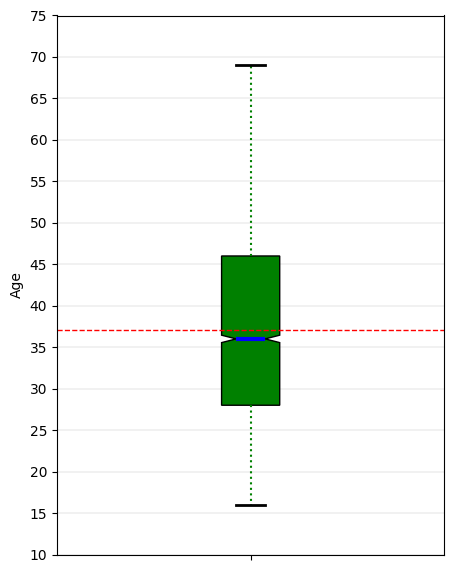

In [25]:
# Boxplot for the 'age' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Wages_df['age'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Age')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(10,76,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [26]:
# 'age' Anderson-Darling Normality Test
result = anderson(Wages_df['age'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 19.460
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


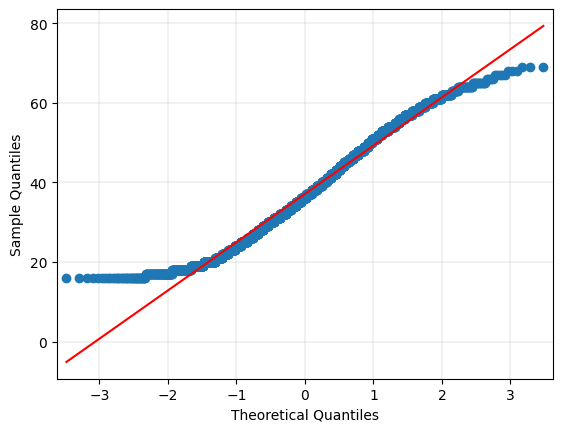

In [27]:
# 'age' QQ plot
qqplot(Wages_df['age'], line='s')
plt.grid(linewidth=0.25)
plt.show()

In [28]:
# Create dataframe of continuous variables for correlation analysis.
Wages_corr = Wages_df[['wages','logwages','education', 'age']].copy()

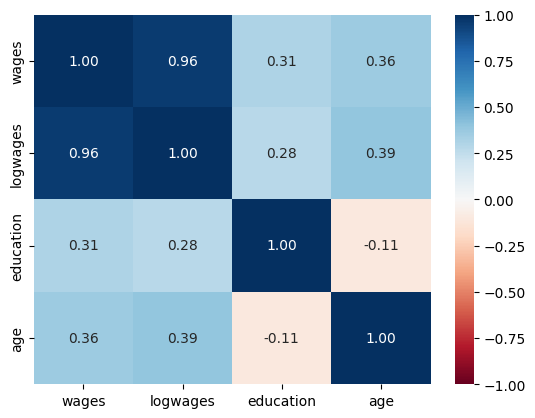

In [29]:
# Generate heatmap for correlation matrix analysis.
corr = Wages_corr.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
plt.show()

1.  Create a scatter-plot matrix for the continuous variables: wages, log wages, education, and age. (10 points)

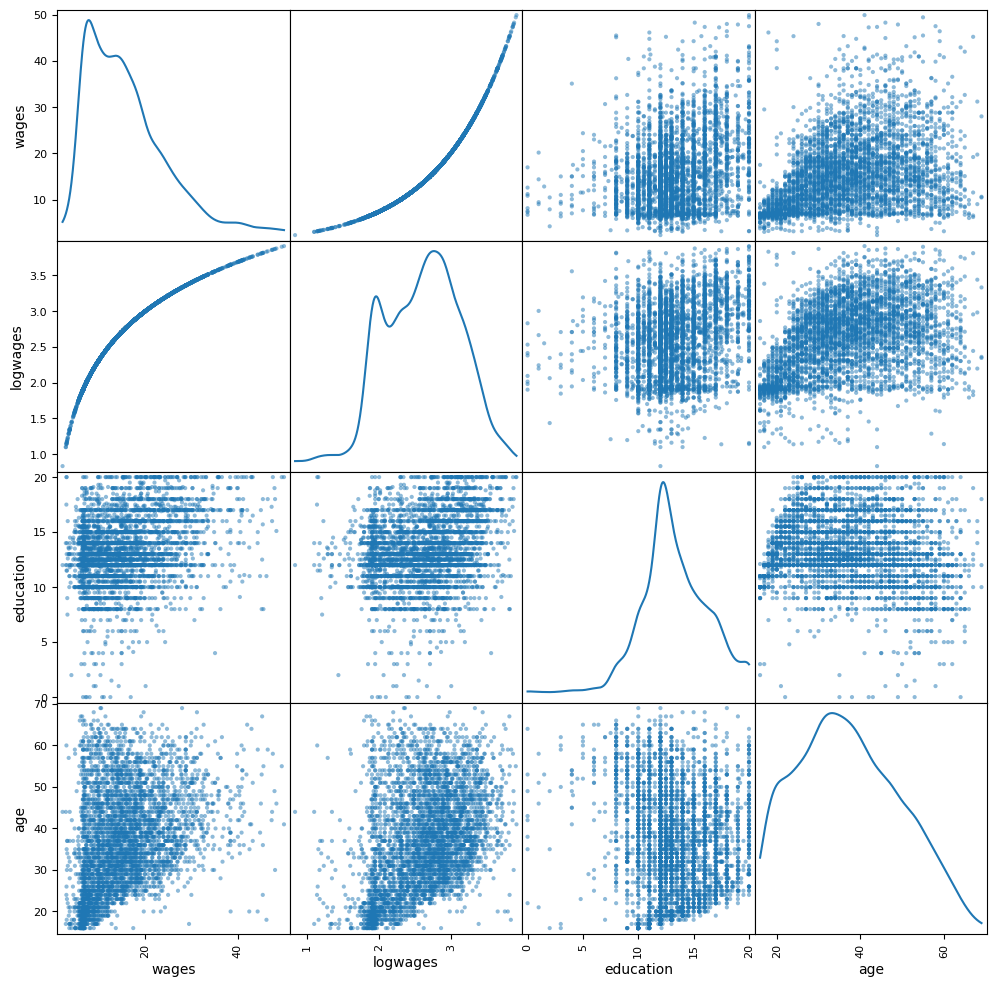

In [30]:
# Generate requested scatter plot matrix from required continuous variables.
scatter_matrix(Wages_corr, diagonal="kde", figsize =(12, 12))
plt.show()

2.  Create two grouped scatter plots for wages and education.  One uses sex as the labeled variable, and the other uses language
as the labeled variable (20 points).

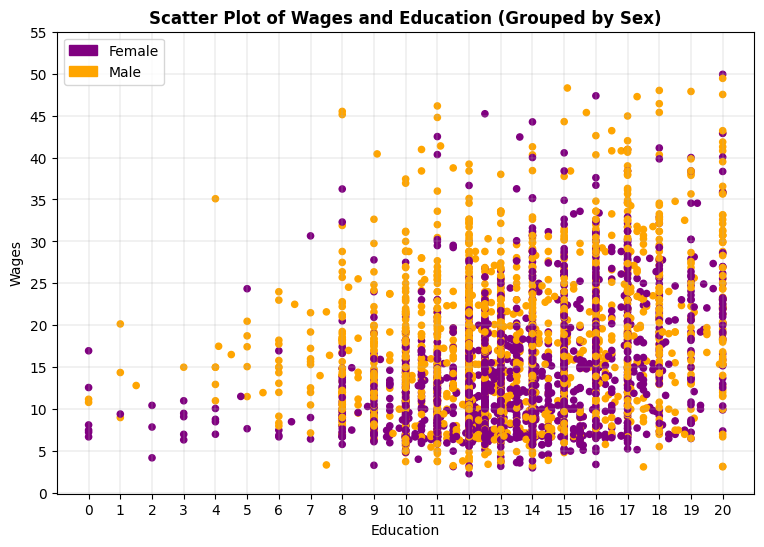

In [31]:
# 2.1 Generate a grouped scatter plot for the continuous variables 'wages' and 'education', using the categorical label variable 'sex'.
# Get color for each data point.
colors = {'Female': 'purple', 'Male': 'orange'}
color_list = [colors[group] for group in Wages_df['sex']]

# Create a scatter plot with color-coding based on 'sex'.
ax = Wages_df.plot.scatter('education',
                'wages',
                c=color_list,
                grid=True,
                figsize=(9,6))

# Create legend handles, labels for each group and add legend to the plot.
legend_handles = [
    mpatches.Patch(color=colors['Female'], label='Female'),
    mpatches.Patch(color=colors['Male'], label='Male')
]
ax.legend(handles=legend_handles,
          loc='upper left')

# Add title and labels.
ax.set_title('Scatter Plot of Wages and Education (Grouped by Sex)',
             weight='bold')
ax.set_xlabel('Education')
ax.set_ylabel('Wages')

plt.xticks(np.arange(0,21,step=1)) 
plt.yticks(np.arange(0,56,step=5)) 
plt.grid(linewidth=0.25)
plt.show()

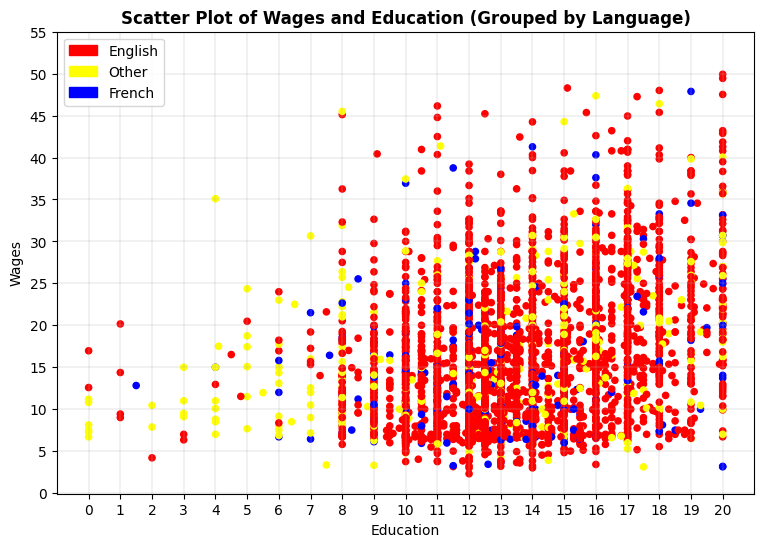

In [32]:
# 2.2 Generate a grouped scatter plot for the continuous variables 'wages' and 'education', using the categorical label variable 'language'.
# Get color for each data point.
colors = {'English': 'red', 'Other': 'yellow', 'French': 'blue'}
color_list = [colors[group] for group in Wages_df['language']]

# Create a scatter plot with color-coding based on 'language'.
ax = Wages_df.plot.scatter('education',
                'wages',
                c=color_list,
                grid=True,
                figsize=(9,6))

# Create legend handles, labels for each group and add legend to the plot.
legend_handles = [
    mpatches.Patch(color=colors['English'], label='English'),
    mpatches.Patch(color=colors['Other'], label='Other'),
    mpatches.Patch(color=colors['French'], label='French'),
]
ax.legend(handles=legend_handles,
          loc='upper left')

# Add title and labels.
ax.set_title('Scatter Plot of Wages and Education (Grouped by Language)',
             weight='bold')
ax.set_xlabel('Education')
ax.set_ylabel('Wages')

plt.xticks(np.arange(0,21,step=1)) 
plt.yticks(np.arange(0,56,step=5)) 
plt.grid(linewidth=0.25)
plt.show()

3.  Create a regression model using wages as the dependent variable with education and age as the independent variables. 
Generate an ANOVA table describing overall performance.  Is the model a good fit? Explain your hypothesis testing, f-test, 
and plots generated. (25 points)

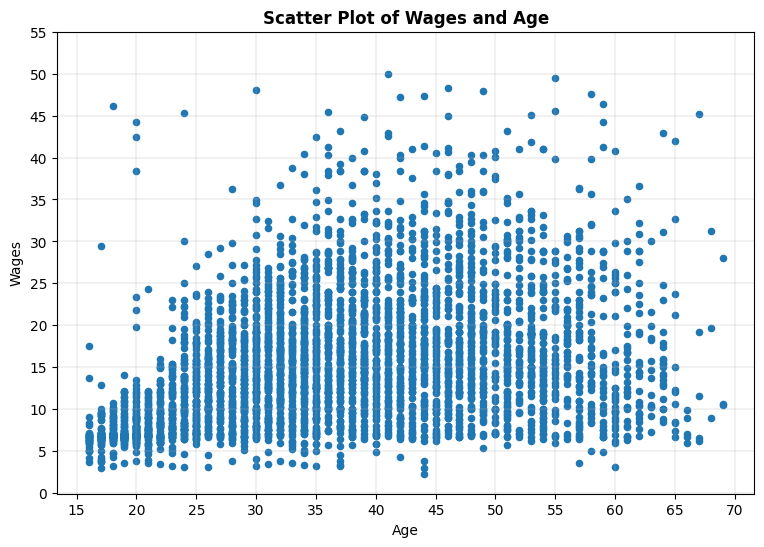

In [33]:
# Generate a scatter plot for the continuous variables 'wages' and 'age'.
ax = Wages_df.plot.scatter('age',
                'wages',
                grid=True,
                figsize=(9,6))

ax.set_title('Scatter Plot of Wages and Age',
             weight='bold')
ax.set_xlabel('Age')
ax.set_ylabel('Wages')

plt.xticks(np.arange(15,71,step=5)) 
plt.yticks(np.arange(0,56,step=5)) 
plt.grid(linewidth=0.25)
plt.show()

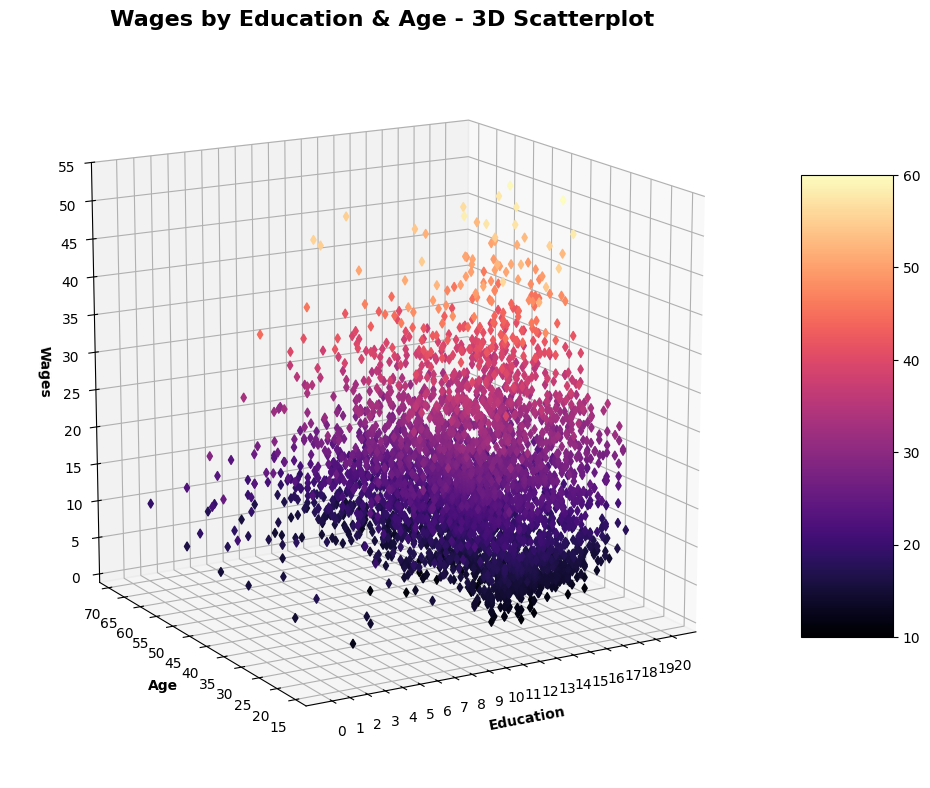

In [34]:
# Generate 3D plot of two significant explanatory variables and the outcome variable.
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection="3d")

x = Wages_df['education'].tolist()
y = Wages_df['age'].tolist()
z = Wages_df['wages'].tolist()

my_cmap = plt.cm.magma
norm = mpl.colors.Normalize(vmin=10, vmax=60)

sctt = ax.scatter3D(x, y, z, c=z, alpha = 1, cmap=plt.cm.magma, marker = 'd')

ax.set_title('Wages by Education & Age - 3D Scatterplot', fontweight='bold', fontsize=16)
ax.set_xlabel("Education", fontweight='bold')
ax.set_ylabel("Age", fontweight='bold')
ax.set_zlabel("Wages", fontweight='bold')
ax.set_zticks([0,5,10,15,20,25,30,35,40,45,50,55])
ax.set_box_aspect(aspect = (1,1,1))
ax.view_init(elev=15, azim=240)

fig.colorbar(mpl.cm.ScalarMappable(norm = norm, cmap = my_cmap), ax = ax, shrink = 0.5, aspect = 5)

plt.xticks(np.arange(0,21,step=1)) 
plt.yticks(np.arange(15,71,step=5))
plt.grid(linewidth=0.25)
plt.show()

In [35]:
# Set Alpha standard for regression model testing.
alpha = 0.05

In [36]:
# Generate required multiple linear regression model.
# Fit linear regression model.
lm = smf.ols("wages ~ education + age", data = Wages_df).fit()
# View model coefficients.
print(lm.params)


Intercept   -6.021653
education    0.901464
age          0.257090
dtype: float64


In [37]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'wages'.
Y = Wages_df['wages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 246,790.472


                            OLS Regression Results                            
Dep. Variable:                  wages   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     660.7
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.56e-248
Time:                        09:57:20   Log-Likelihood:                -13310.
No. Observations:                3987   AIC:                         2.663e+04
Df Residuals:                    3984   BIC:                         2.665e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0217      0.619     -9.729      0.0

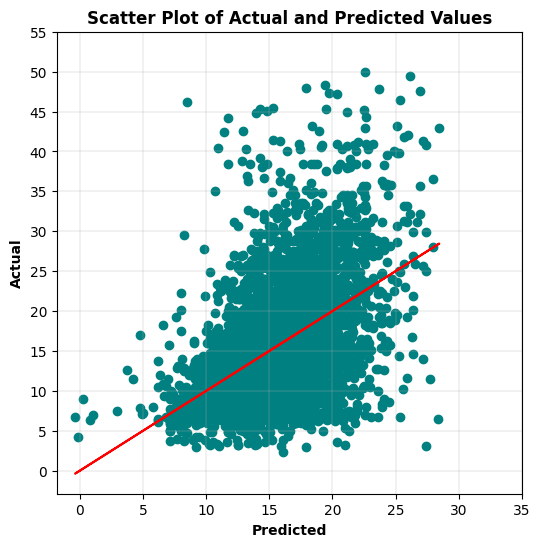

In [38]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Assess multicollinearity with VIF table.
X = Wages_df[['education','age']]
# Create VIF dataframe.
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
# Calculate VIF for explanatory variable.
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                         for i in range(len(X.columns))]
# print(vif_data, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}",'\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(0,36,step=5)) 
plt.yticks(np.arange(0,56,step=5)) 
plt.grid(linewidth=0.25)
plt.show()

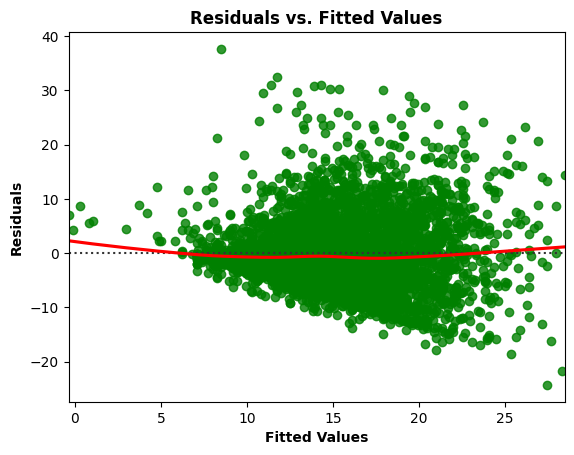

In [39]:
# Display Residuals vs. Fitted values scatter plot.
fitted = lm.fittedvalues
residuals = lm.resid
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'}, color='green') 
plt.title('Residuals vs. Fitted Values', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.show()

In [40]:
# Residuals Anderson-Darling Normality Test
result = anderson(residuals)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 32.202
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


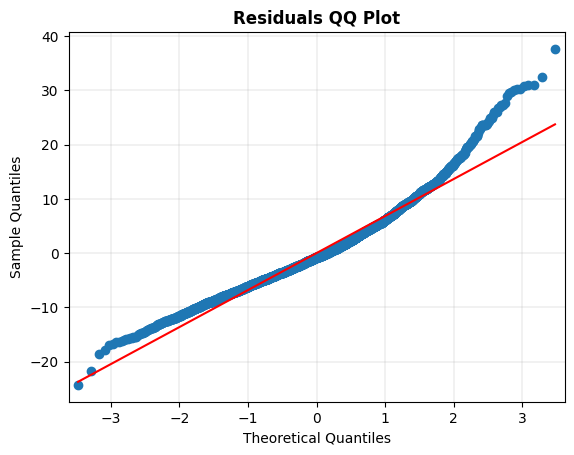

In [41]:
# Residuals QQ Plot
qqplot(residuals, line='s')
plt.title('Residuals QQ Plot', fontweight='bold')
plt.grid(linewidth=0.25)
plt.show()

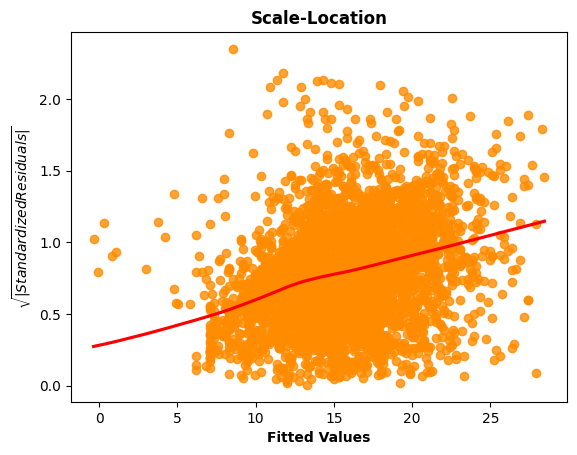

In [43]:
# Scale-Location Plot
resid_standardized = lm.get_influence().resid_studentized_internal

sns.regplot(x=fitted, y=np.sqrt(np.abs(resid_standardized)), color='darkorange',
            ci=None, lowess=True, line_kws={'color': 'red'})
plt.title('Scale-Location', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$', fontweight='bold')
plt.show()

In [44]:
# Generate the Breusch-Pagan test for heteroscedasticity.
bp_test = het_breuschpagan(lm.resid, lm.model.exog)
print("lm:", f"{bp_test[0]:0,.3f}", "lm_pvalue:", f"{bp_test[1]:0,.3f}")

lm: 166.360 lm_pvalue: 0.000


In [45]:
# Generate the White test for heteroscedasticity.
# w_test = het_white(lm.resid, lm.model.exog)
# print("lm:", w_test[0], "lm_pvalue:", w_test[1])

In [46]:
# Residuals vs. Leverage Plot
# fig, ax = plt.subplots(figsize=(12,12))
# fig = sm.graphics.influence_plot(lm, alpha=0.05, ax=ax, criterion="cooks")
# plt.show()

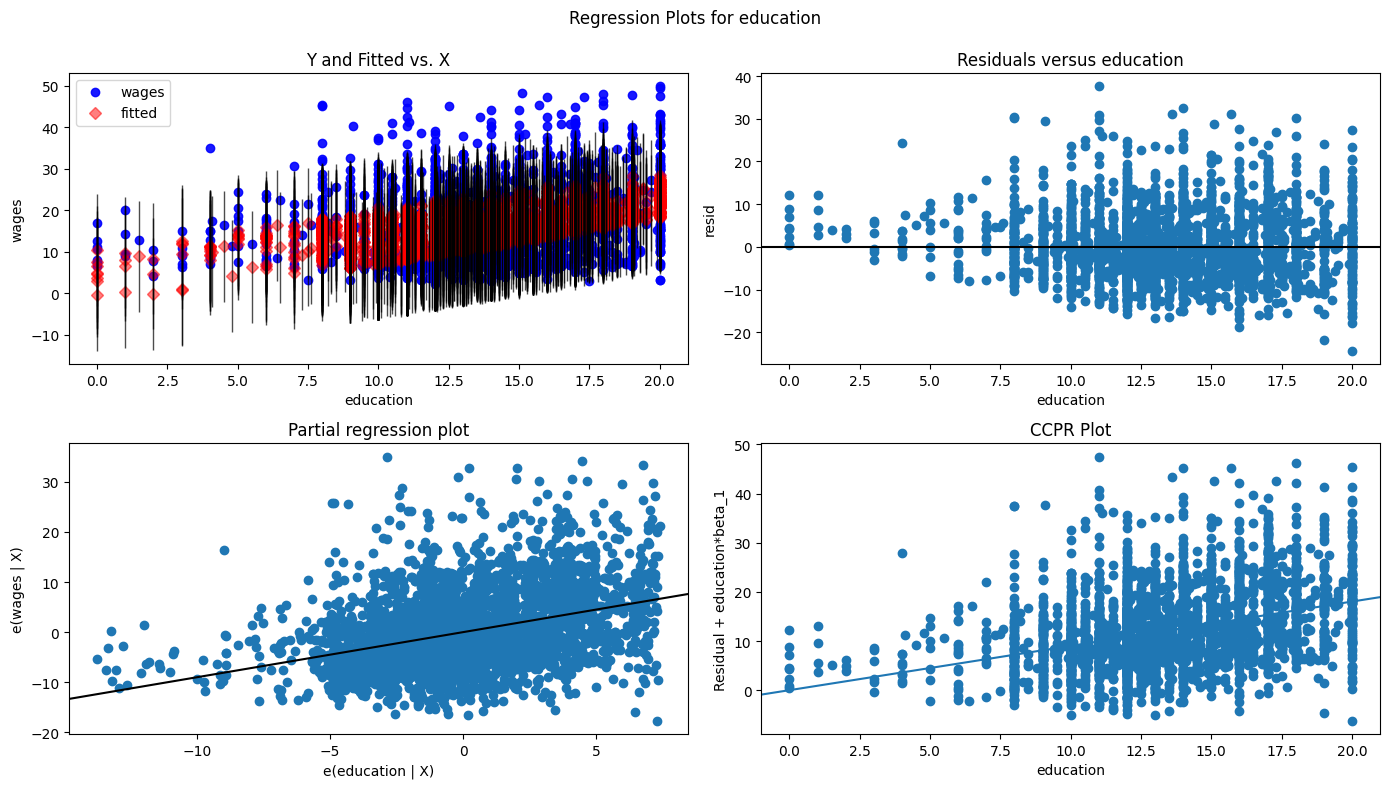

In [47]:
# Display model regression plots for the 'education' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'education',fig=fig)
plt.show()

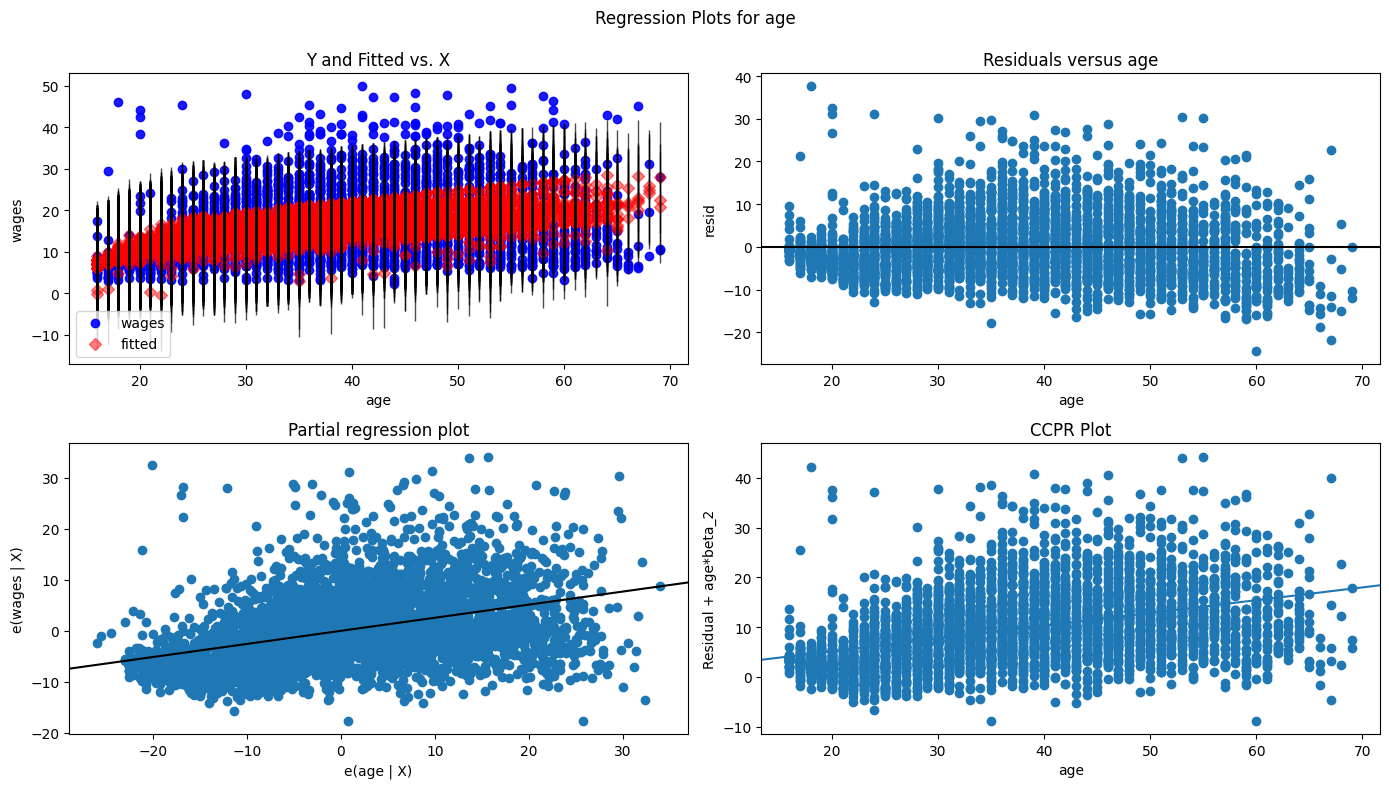

In [48]:
# Display model regression plots for the 'age' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'age',fig=fig)
plt.show()

3 Interpret the results for wages MLR model:

The required OLS regression model was run with wages as the outcome variable.  The R-squared value of 0.249 indicates that 24.9% of the 
variation in the predicted wage values can be explained by this multiple linear regression model with education and age as explanatory 
variables.  The Y intercept, beta0, equals -6.021653 USD/hr, education, beta1, equals 0.9015 USD/hr per 1 level of education, and age, 
beta2, equals 0.2571 USD/hr per 1 year of age.  The F-statistic of 660.7 easily exceeded the F-critical of 9.552, and the F-statistic 
probability was near zero, safely under the 0.05 alpha standard (rejecting H0 the null hypothesis), indicating clearly that the model 
relationship between the outcome and explanatory variables is statistically significant. The education and age variables had a t-statistic 
that exceeded the absolute t-critical of 4.303, and p-values near zero, safely under the 0.05 alpha standard (rejecting H0 the null 
hypothesis), indicating clearly that their relationships with wages are statistically significant.

With wages having a SST of 246,790.472, the wages MLR model using education and age variables reduced it 61,468.028 to a SSR of 185,322.444. 
When plotting the residuals and the fitted value, there seems to be a reasonable amount of linearity in the model.  Concerning normality of 
the residuals, the Jarque-Bera test statistic of 1,092.696 and Jarque-Bera probability near zero, safely under the 0.05 alpha standard 
(rejecting H0 the null hypothesis), indicates a lack of normality. The Anderson-Darling result of 32.202 and QQ plot support that conclusion.  
The Scale-Location chart showed an incline that indicates notable heteroscedasticity in the model, and the Breusch-Pagan test statistic of 
166.36 and p-value of nearly zero, safely under the 0.05 alpha standard (rejecting H0 the null hypothesis), indicate that heteroscedasticity 
is present in the model.  Believe that the significantly right skewed distribution of the wages outcome variable and the somewhat left tailed 
distribution for the education explanatory variable were primarily responsible for issues with MLR model normality and heteroscedasticity.
The low R squared value, extremely low Log-Likelihood value, and very high AIC/BIC values are an indicator that this MLR model would not be a 
good predictor of wages.

4.  Create a regression model using log wages as the dependent variable with education and age as the independent variables. 
Generate an ANOVA table describing overall performance.  Is the model a good fit? Explain your hypothesis testing results (25 points).

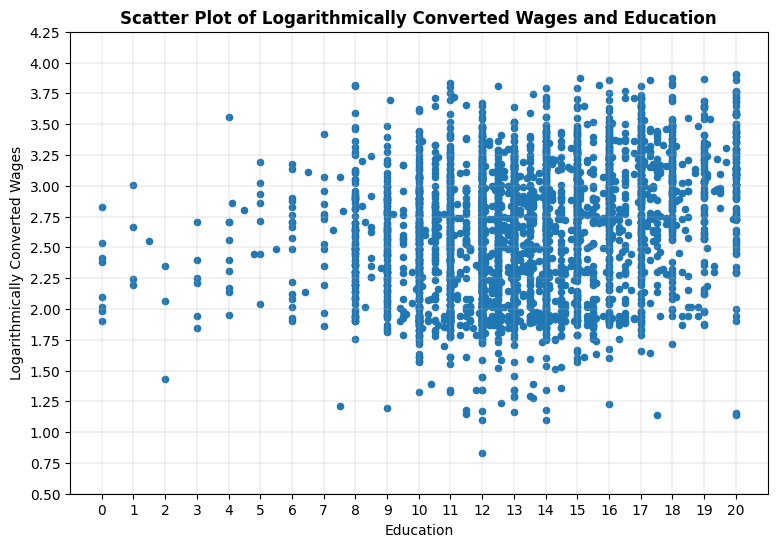

In [49]:
# Generate a scatter plot for the continuous variables 'logwages' and 'education'.
ax = Wages_df.plot.scatter('education',
                'logwages',
                grid=True,
                figsize=(9,6))

ax.set_title('Scatter Plot of Logarithmically Converted Wages and Education',
             weight='bold')
ax.set_xlabel('Education')
ax.set_ylabel('Logarithmically Converted Wages')

plt.xticks(np.arange(0,21,step=1)) 
plt.yticks(np.arange(0.50,4.50,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

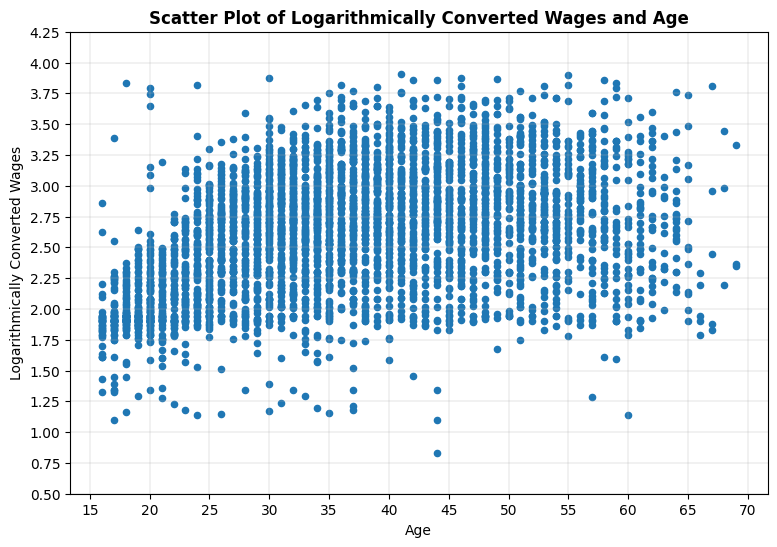

In [50]:
# Generate a scatter plot for the continuous variables 'logwages' and 'age'.
ax = Wages_df.plot.scatter('age',
                'logwages',
                grid=True,
                figsize=(9,6))

ax.set_title('Scatter Plot of Logarithmically Converted Wages and Age',
             weight='bold')
ax.set_xlabel('Age')
ax.set_ylabel('Logarithmically Converted Wages')

plt.xticks(np.arange(15,71,step=5)) 
plt.yticks(np.arange(0.50,4.50,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

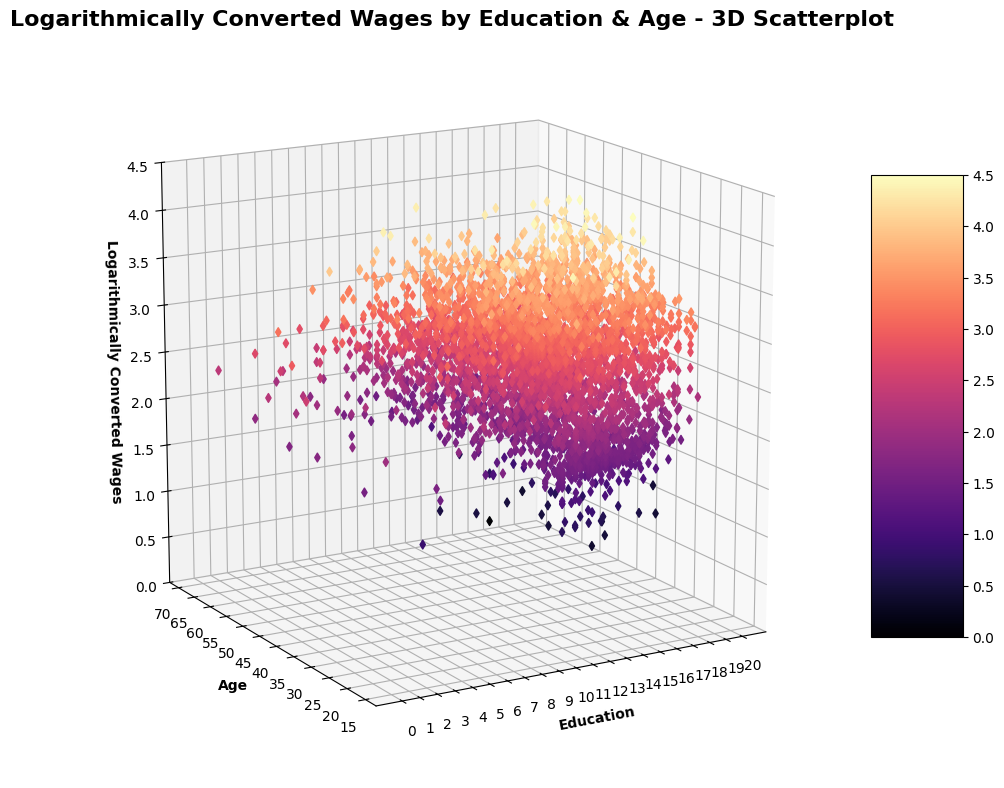

In [51]:
# Generate 3D plot of two significant explanatory variables and the outcome variable.
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection="3d")

x = Wages_df['education'].tolist()
y = Wages_df['age'].tolist()
z = Wages_df['logwages'].tolist()

my_cmap = plt.cm.magma
norm = mpl.colors.Normalize(vmin=0, vmax=4.5)

sctt = ax.scatter3D(x, y, z, c=z, alpha = 1, cmap=plt.cm.magma, marker = 'd')

ax.set_title('Logarithmically Converted Wages by Education & Age - 3D Scatterplot', fontweight='bold', fontsize=16)
ax.set_xlabel("Education", fontweight='bold')
ax.set_ylabel("Age", fontweight='bold')
ax.set_zlabel("Logarithmically Converted Wages", fontweight='bold')
ax.set_zticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5])
ax.set_box_aspect(aspect = (1,1,1))
ax.view_init(elev=15, azim=240)

fig.colorbar(mpl.cm.ScalarMappable(norm = norm, cmap = my_cmap), ax = ax, shrink = 0.5, aspect = 5)

plt.xticks(np.arange(0,21,step=1)) 
plt.yticks(np.arange(15,71,step=5))
plt.grid(linewidth=0.25)
plt.show()

In [52]:
# Generate required multiple linear regression model.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_df).fit()
# View model coefficients.
print(lm.params)


Intercept    1.240207
education    0.054032
age          0.017751
dtype: float64


In [53]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_df['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 1,010.056


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     699.4
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          4.67e-261
Time:                        09:59:43   Log-Likelihood:                -2320.3
No. Observations:                3987   AIC:                             4647.
Df Residuals:                    3984   BIC:                             4665.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2402      0.039     31.549      0.0

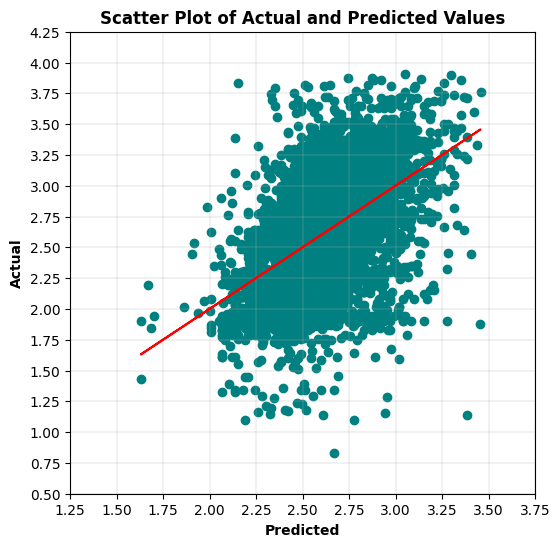

In [54]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_df[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.25,4.0,step=0.25)) 
plt.yticks(np.arange(0.5,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

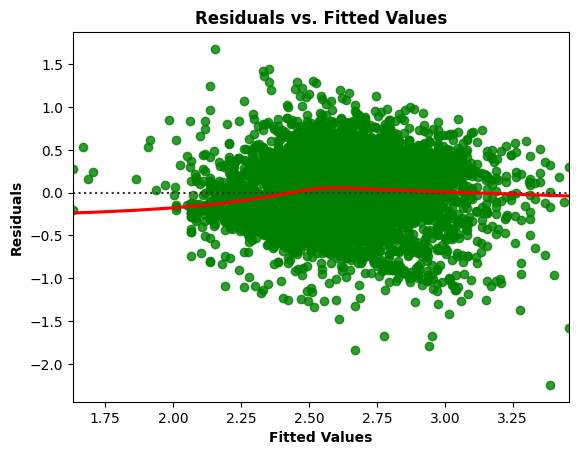

In [55]:
# Display Residuals vs. Fitted values scatter plot.
fitted = lm.fittedvalues
residuals = lm.resid
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'}, color='green') 
plt.title('Residuals vs. Fitted Values', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.show()

In [56]:
# Residuals Anderson-Darling Normality Test
result = anderson(residuals)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 4.048
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


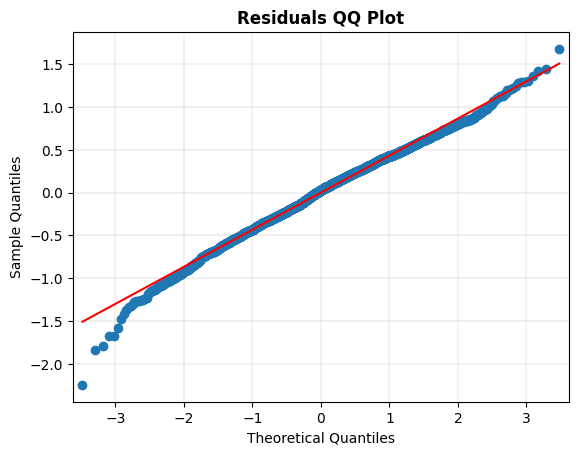

In [57]:
# Residuals QQ Plot
qqplot(residuals, line='s')
plt.title('Residuals QQ Plot', fontweight='bold')
plt.grid(linewidth=0.25)
plt.show()

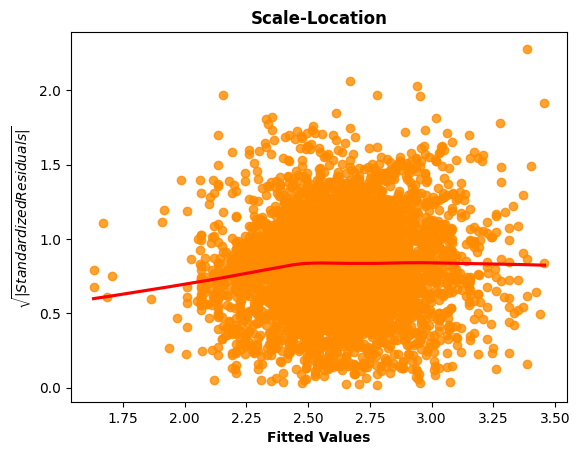

In [58]:
# Scale-Location Plot
resid_standardized = lm.get_influence().resid_studentized_internal

sns.regplot(x=fitted, y=np.sqrt(np.abs(resid_standardized)), color='darkorange',
            ci=None, lowess=True, line_kws={'color': 'red'})
plt.title('Scale-Location', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$', fontweight='bold')
plt.show()

In [59]:
# Generate the Breusch-Pagan test for heteroscedasticity.
bp_test = het_breuschpagan(lm.resid, lm.model.exog)
print("lm:", f"{bp_test[0]:0,.3f}", "lm_pvalue:", f"{bp_test[1]:0,.3f}")

lm: 43.336 lm_pvalue: 0.000


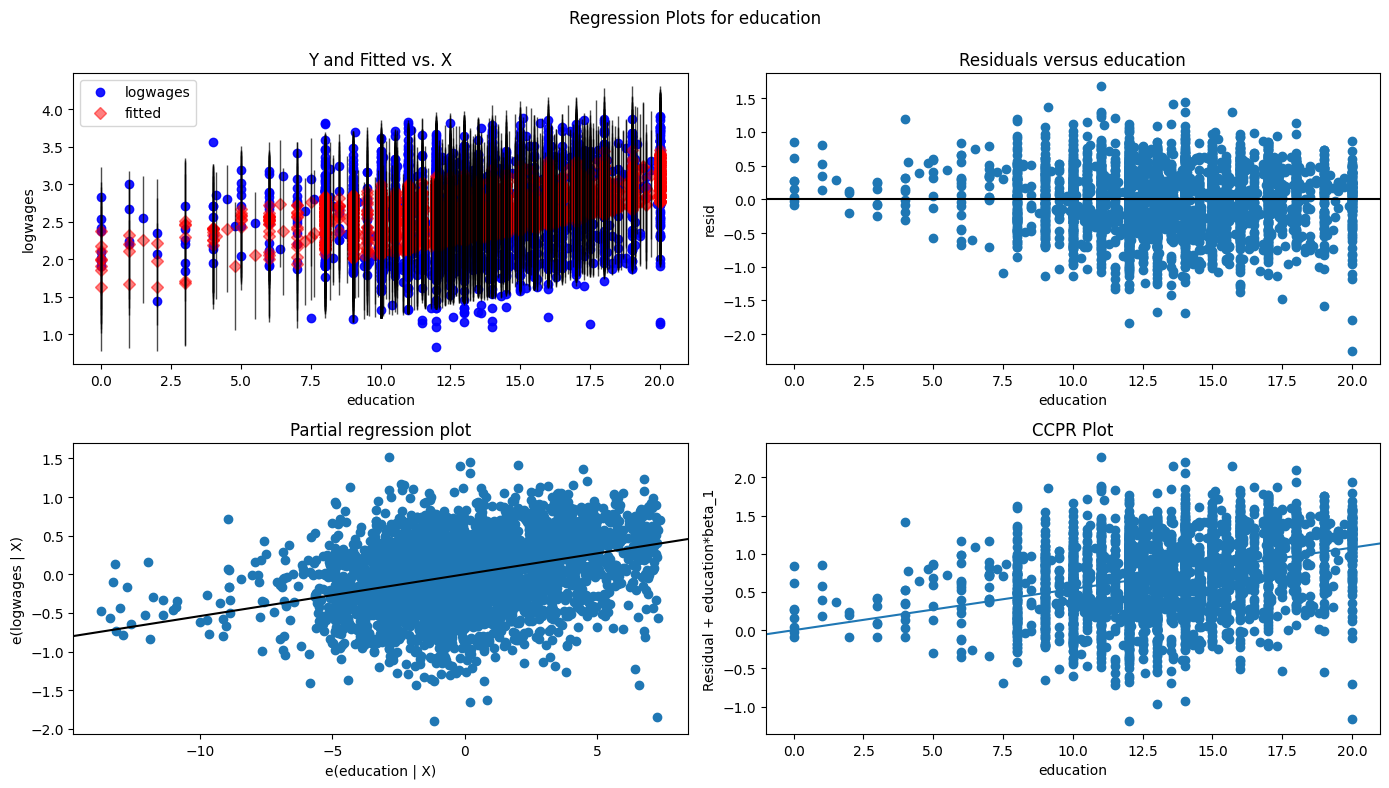

In [60]:
# Display model regression plots for the 'education' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'education',fig=fig)
plt.show()

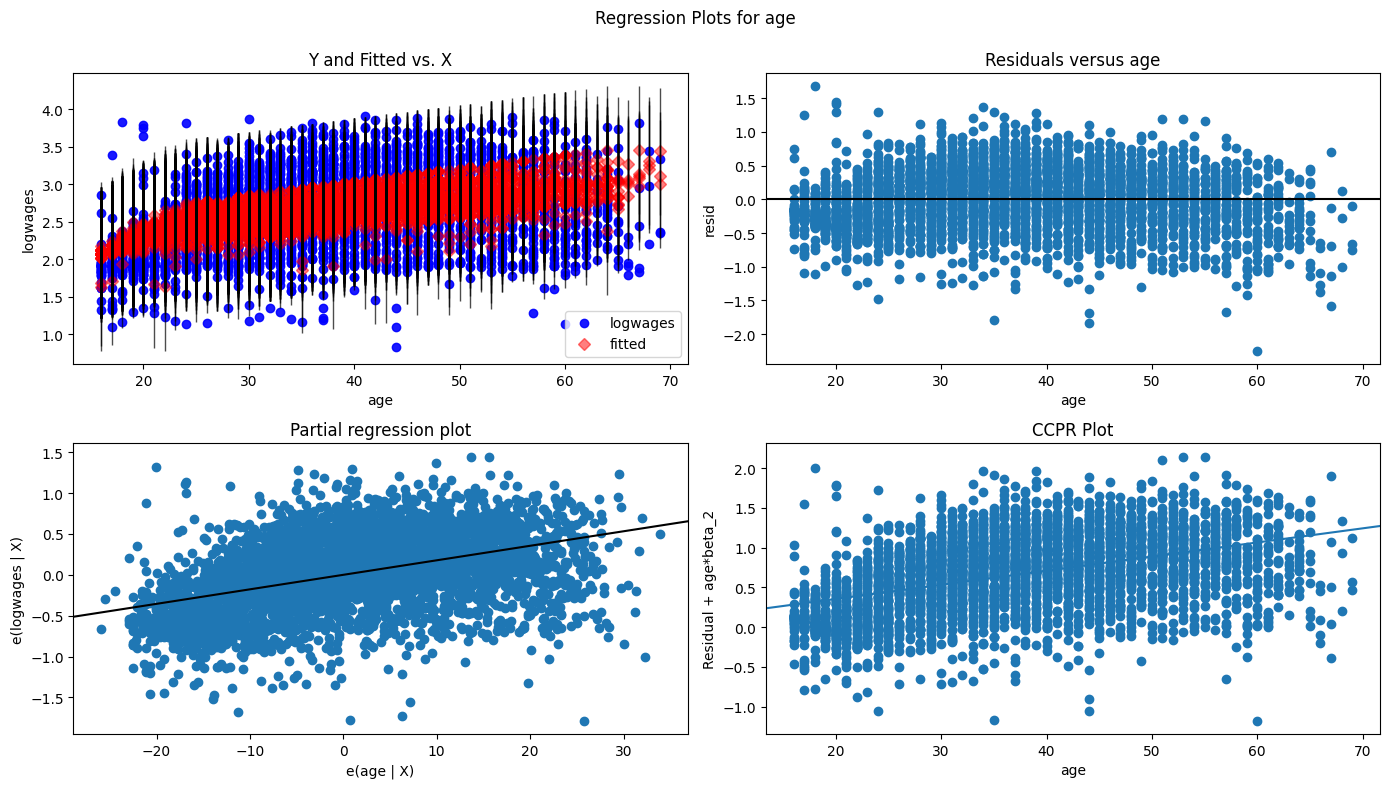

In [61]:
# Display model regression plots for the 'age' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'age',fig=fig)
plt.show()

4 Interpret the results for the logarithmically converted wages MLR model:

The required OLS regression model was run with logwages as the outcome variable.  The R-squared value of 0.260 indicates that 26.0% of the 
variation in the predicted logwages values can be explained by this multiple linear regression model with education and age as explanatory 
variables.  The Y intercept, beta0, equals 1.240207 log(USD/hr), education, beta1, equals 0.054032 log(USD/hr) per 1 level of education, 
and age, beta2, equals 0.017751 log(USD/hr) per 1 year of age.  The F-statistic of 699.4 easily exceeded the F-critical of 9.552, and the 
F-statistic probability was near zero, safely under the 0.05 alpha standard (rejecting H0 the null hypothesis), indicating clearly that 
the model relationship between the outcome and explanatory variables is statistically significant. The education and age variables had a 
t-statistic that exceeded the absolute t-critical of 4.303, and p-values near zero, safely under the 0.05 alpha standard (rejecting H0 the 
null hypothesis), indicating clearly that their relationships with logwages are statistically significant. 

With logwages having a SST of 1,010.056, the logwages MLR model using education and age variables reduced it 262.477 to a SSR of 747.580. 
When plotting the residuals and the fitted value, there seems to be a reasonable amount of linearity in the model. Concerning normality of 
the residuals, the Jarque-Bera test statistic of 61.517 and Jarque-Bera probability near zero, safely under the 0.05 alpha standard 
(rejecting H0 the null hypothesis), indicates a lack of normality. Although, the Anderson-Darling result of 4.048 somewhat supports that 
conclusion, and QQ plot rendering shows some acceptable normality.  The Scale-Location chart showed some fluctuation that indicates potential
heteroscedasticity in the model, and the Breusch-Pagan test statistic of 43.336 and p-value of nearly zero, safely under the 0.05 alpha 
standard (rejecting H0 the null hypothesis), indicate that heteroscedasticity is present in the model.  On the whole, the logarithmically 
transformed wages outcome variable slightly improved model predictions, significantly improved the residual normality, and helped correct 
some heteroscedasticity.  Although, the low R squared value, low Log-Likelihood value, and high AIC/BIC values are an indicator that this 
MLR model would not be a good predictor of logwages.

5.  Use grouping variables for sex and language, and add these to model. Select the grouping variable that creates the best model.
Explain the performance difference (if any) over the previous models. (30 points)

5a. My first interpretation of this problem was to add One-Hot endcoed variables for sex and language values to the logwages MLR model,
generate modeling results with them added, and then generate modeling results by adding sex and language One-Hot endcoded variables 
exclusively in two different MLR models.

In [62]:
# Use One-Hot Encoding to create a new binary column for Female and Male in the 'sex' variable.
Wages_binary = pd.get_dummies(Wages_df, columns=['sex'])

In [63]:
# Use One-Hot Encoding to create a new binary column for English, French, and Other in the 'language' variable.
Wages_binary = pd.get_dummies(Wages_binary, columns=['language'])
Wages_binary.head()

wages  education  age  logwages  sex_Female  sex_Male  language_English  \
0  10.56       15.0   40  2.357073       False      True              True   
1  11.00       13.2   19  2.397895       False      True              True   
2  17.76       14.0   46  2.876949       False      True             False   
3  14.00       16.0   50  2.639057        True     False              True   
4   8.20       15.0   31  2.104134       False      True              True   

   language_French  language_Other  
0            False           False  
1            False           False  
2            False            True  
3            False           False  
4            False           False

In [64]:
# Generate required multiple linear regression model.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age + sex_Female + sex_Male + language_English + language_French + language_Other", data = Wages_binary).fit()
# View model coefficients.
print(lm.params)


Intercept                   0.673905
sex_Female[T.True]          0.224823
sex_Male[T.True]            0.449082
language_English[T.True]    0.219685
language_French[T.True]     0.224607
language_Other[T.True]      0.229612
education                   0.055035
age                         0.017621
dtype: float64


In [65]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_binary['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 1,010.056


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     356.9
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          8.36e-317
Time:                        10:00:54   Log-Likelihood:                -2181.9
No. Observations:                3987   AIC:                             4376.
Df Residuals:                    3981   BIC:                             4414.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

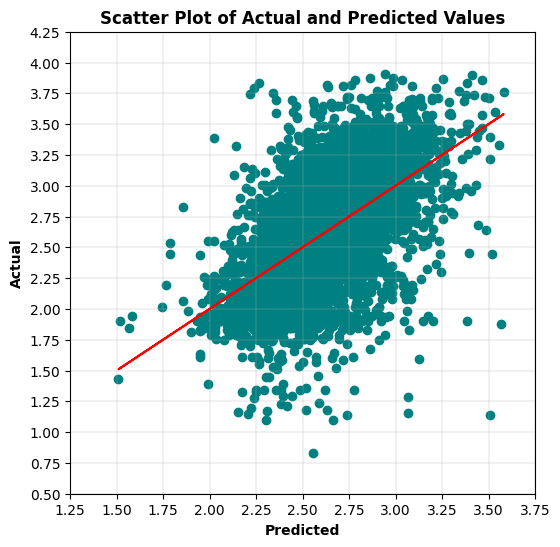

In [66]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,5,6)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=5))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_binary[['education','age', 'sex_Female', 'sex_Male', 'language_English', 'language_French', 'language_Other']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.25,4.0,step=0.25)) 
plt.yticks(np.arange(0.5,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

In [67]:
# Generate required multiple linear regression model with 'sex' One-Hot encoded variables.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age + sex_Female + sex_Male", data = Wages_binary).fit()
# View model coefficients.
print(lm.params)

Intercept             0.821543
sex_Female[T.True]    0.298643
sex_Male[T.True]      0.522900
education             0.054935
age                   0.017651
dtype: float64


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     595.0
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.59e-319
Time:                        10:01:22   Log-Likelihood:                -2182.0
No. Observations:                3987   AIC:                             4372.
Df Residuals:                    3983   BIC:                             4397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.8215      0

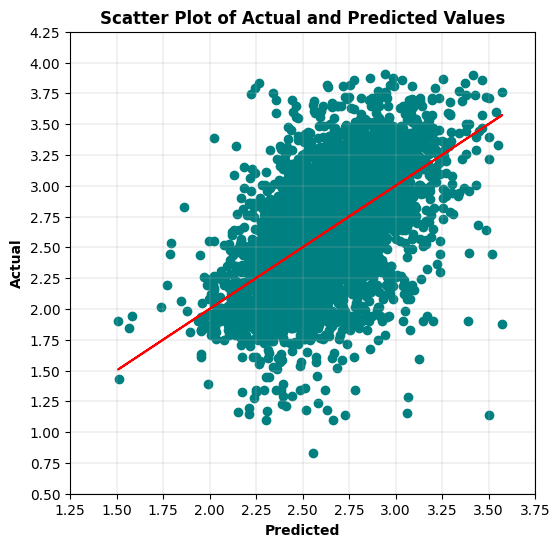

In [68]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,3,4)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=3))
print(f"t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_binary[['education','age', 'sex_Female', 'sex_Male']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.25,4.0,step=0.25)) 
plt.yticks(np.arange(0.5,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

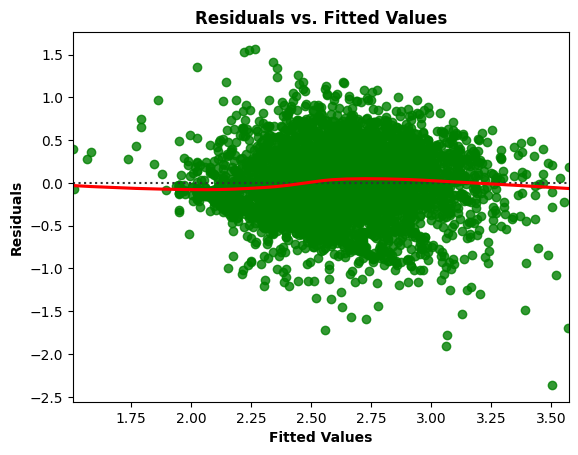

In [69]:
# Display Residuals vs. Fitted values scatter plot.
fitted = lm.fittedvalues
residuals = lm.resid
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'}, color='green') 
plt.title('Residuals vs. Fitted Values', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.show()

In [70]:
# Residuals Anderson-Darling Normality Test
result = anderson(residuals)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.219
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


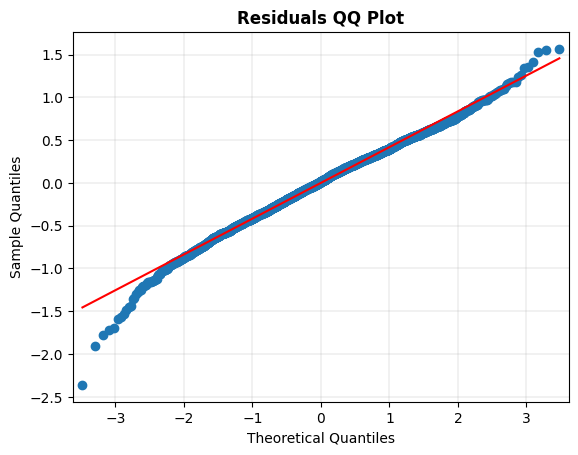

In [71]:
# Residuals QQ Plot
qqplot(residuals, line='s')
plt.title('Residuals QQ Plot', fontweight='bold')
plt.grid(linewidth=0.25)
plt.show()

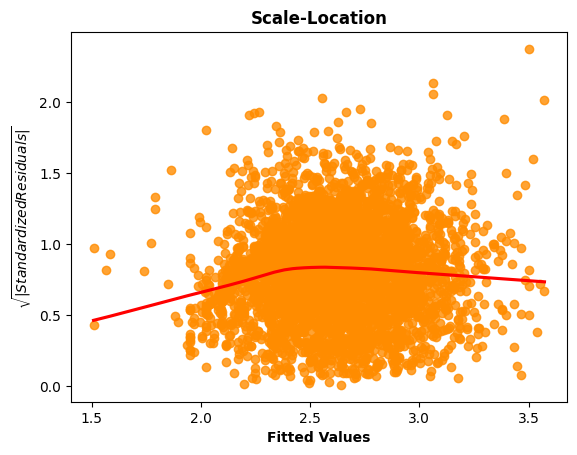

In [72]:
# Scale-Location Plot
resid_standardized = lm.get_influence().resid_studentized_internal

sns.regplot(x=fitted, y=np.sqrt(np.abs(resid_standardized)), color='darkorange',
            ci=None, lowess=True, line_kws={'color': 'red'})
plt.title('Scale-Location', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$', fontweight='bold')
plt.show()

In [73]:
# Generate the Breusch-Pagan test for heteroscedasticity.
bp_test = het_breuschpagan(lm.resid, lm.model.exog)
print("lm:", f"{bp_test[0]:0,.3f}", "lm_pvalue:", f"{bp_test[1]:0,.3f}")

lm: 28.438 lm_pvalue: 0.000


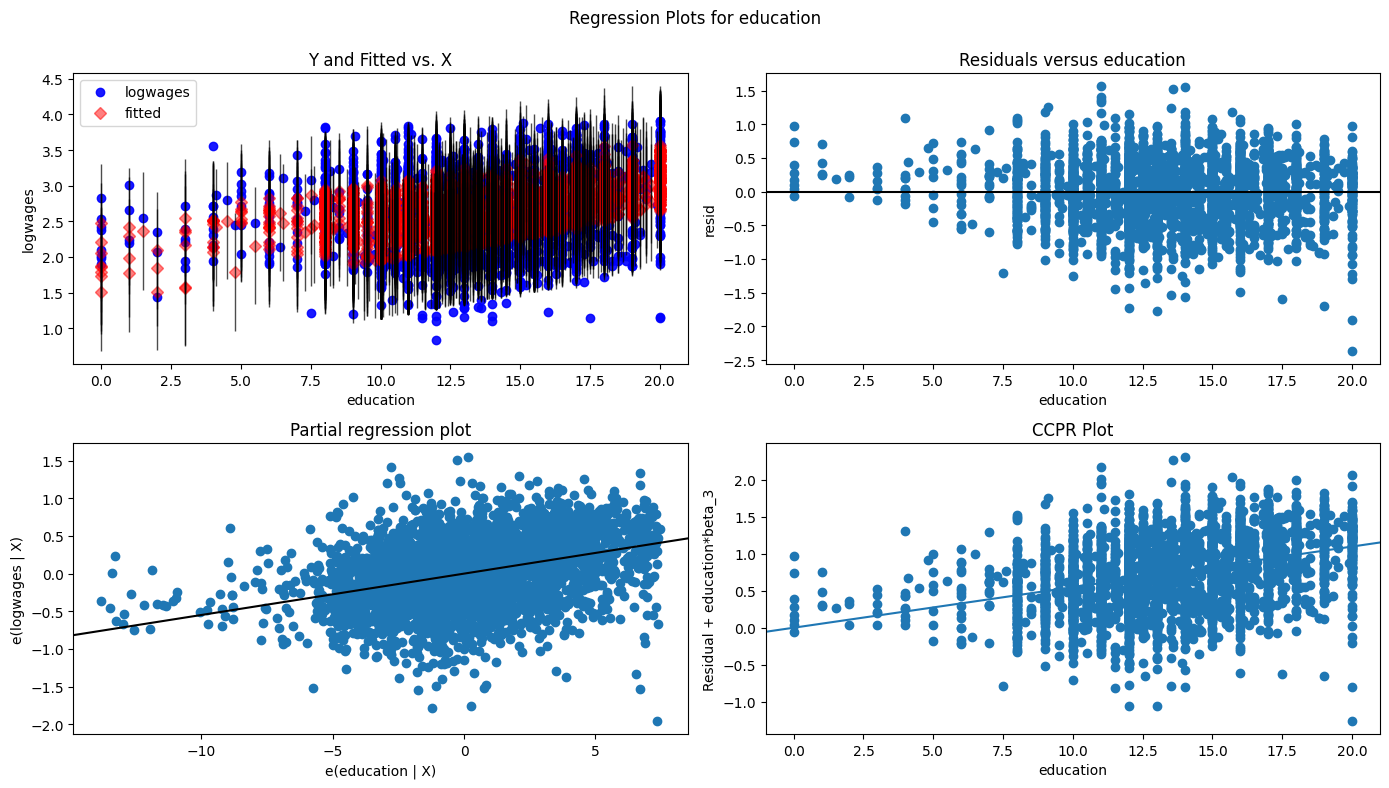

In [74]:
# Display model regression plots for the 'education' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'education',fig=fig)
plt.show()

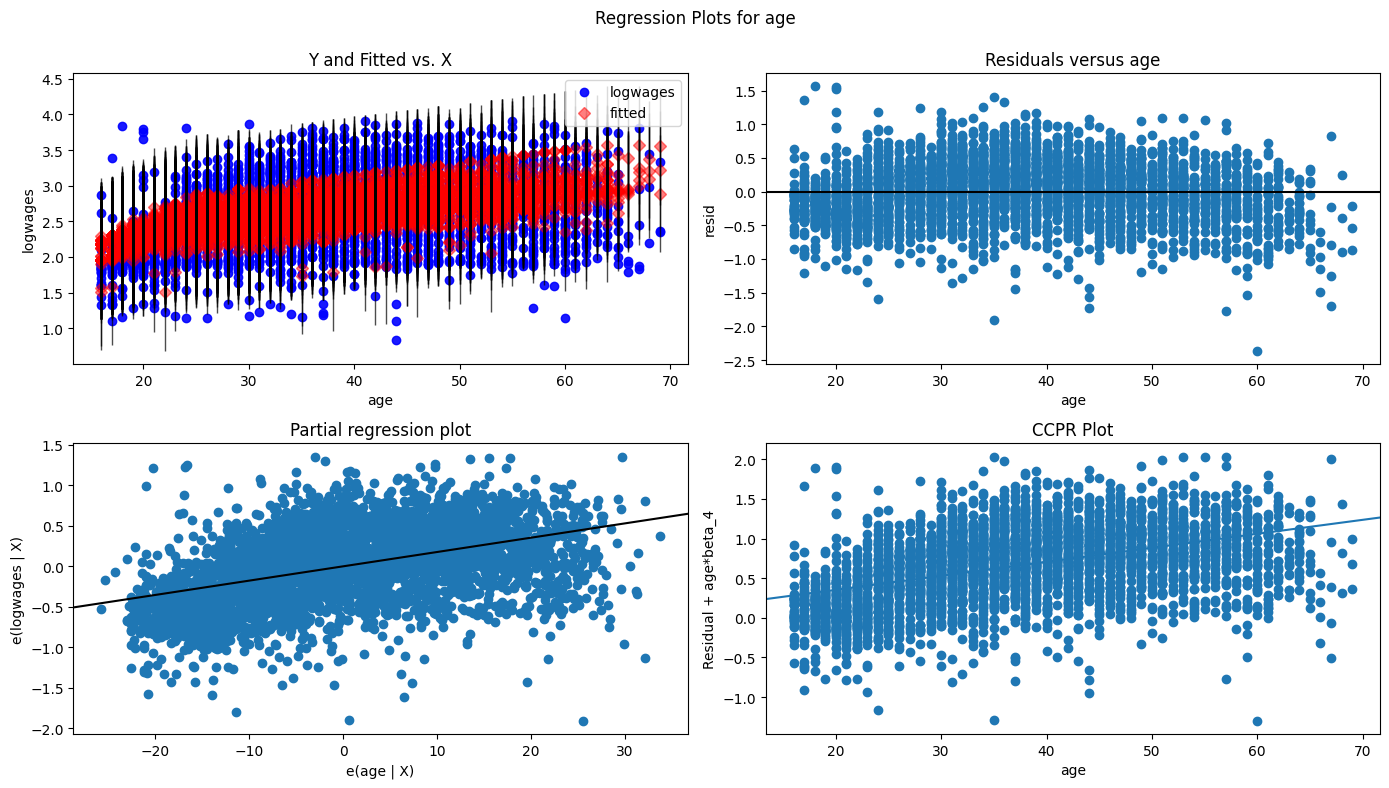

In [75]:
# Display model regression plots for the 'age' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'age',fig=fig)
plt.show()

In [76]:
# Generate required multiple linear regression model with 'language' One-Hot encoded variables.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age + language_English + language_French + language_Other", data = Wages_binary).fit()
# View model coefficients.
print(lm.params)

Intercept                   0.933951
language_English[T.True]    0.303931
language_French[T.True]     0.318326
language_Other[T.True]      0.311695
education                   0.054136
age                         0.017726
dtype: float64


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     349.6
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          2.73e-258
Time:                        10:03:06   Log-Likelihood:                -2320.1
No. Observations:                3987   AIC:                             4650.
Df Residuals:                    3982   BIC:                             4682.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

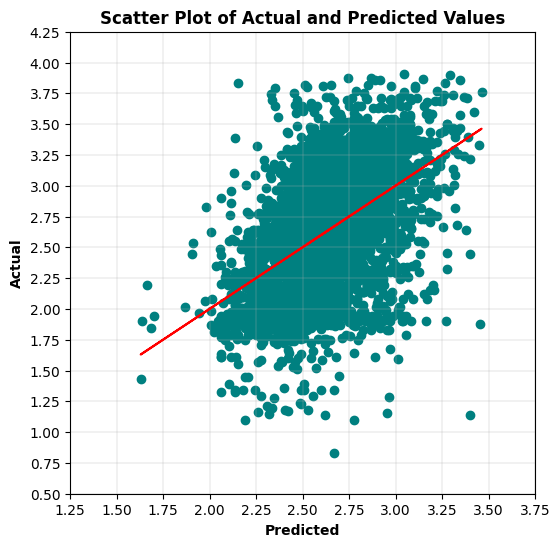

In [77]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,4,5)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=4))
print(f"t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_binary[['education','age', 'language_English', 'language_French', 'language_Other']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.25,4.0,step=0.25)) 
plt.yticks(np.arange(0.5,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

5b. After discussing this with the professor, I believe he wanted individual data groups associated with sex and language values to have 
a MLR model estimating logarithmically converted wages with age and education variables.

In [78]:
# Create individual dataframes associated with Females, Males, English, French, and Other values.
Wages_female = Wages_df[Wages_df.sex == 'Female']
Wages_male = Wages_df[Wages_df.sex == 'Male']
Wages_english = Wages_df[Wages_df.language == 'English']
Wages_french = Wages_df[Wages_df.language == 'French']
Wages_other = Wages_df[Wages_df.language == 'Other']

In [79]:
# Generate required multiple linear regression model for Female group.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_female).fit()
# View model coefficients.
print(lm.params)


Intercept    1.112596
education    0.064476
age          0.014391
dtype: float64


In [80]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_female['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 468.137


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     330.3
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.21e-124
Time:                        10:03:30   Log-Likelihood:                -1100.2
No. Observations:                2001   AIC:                             2206.
Df Residuals:                    1998   BIC:                             2223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1126      0.056     19.999      0.0

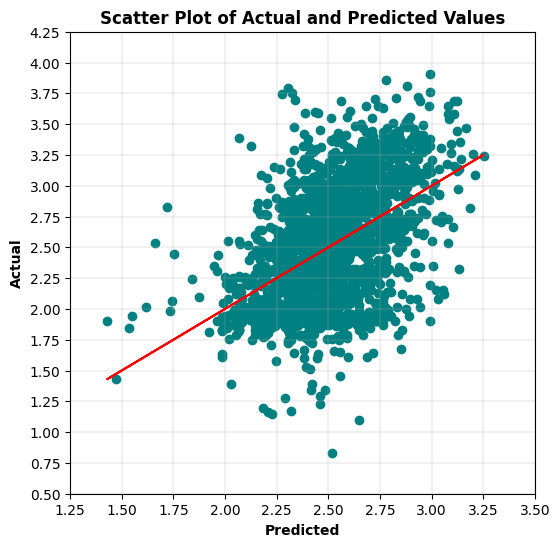

In [81]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_female[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.25,3.75,step=0.25)) 
plt.yticks(np.arange(0.5,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

In [82]:
# Generate required multiple linear regression model for Male group.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_male).fit()
# View model coefficients.
print(lm.params)

Intercept    1.331881
education    0.046639
age          0.020940
dtype: float64


In [83]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_male['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 493.026


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     465.3
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          2.03e-166
Time:                        10:03:45   Log-Likelihood:                -1052.4
No. Observations:                1986   AIC:                             2111.
Df Residuals:                    1983   BIC:                             2127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3319      0.051     25.979      0.0

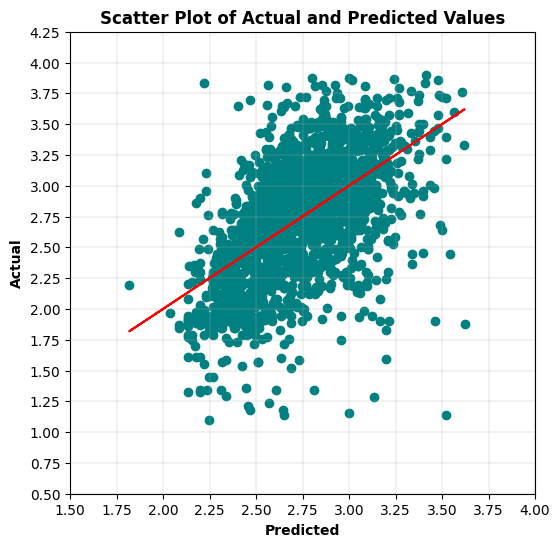

In [84]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_male[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.5,4.25,step=0.25)) 
plt.yticks(np.arange(0.5,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

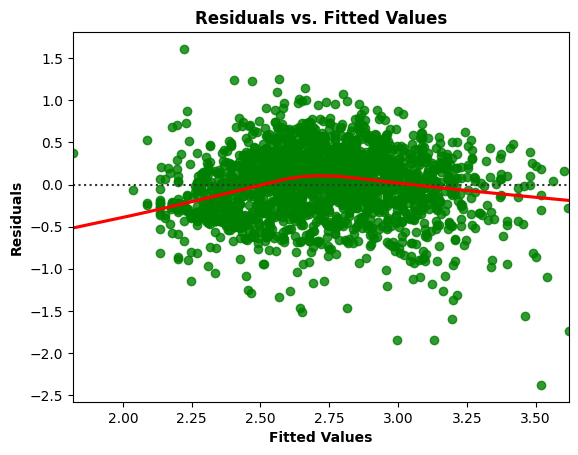

In [85]:
# Display Residuals vs. Fitted values scatter plot.
fitted = lm.fittedvalues
residuals = lm.resid
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'}, color='green') 
plt.title('Residuals vs. Fitted Values', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.show()

In [86]:
# Residuals Anderson-Darling Normality Test
result = anderson(residuals)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 4.415
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


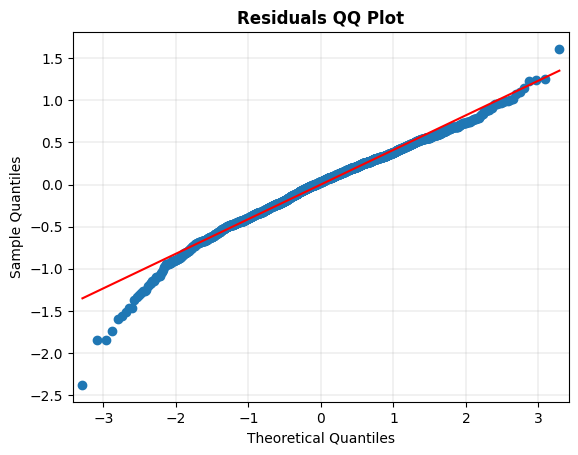

In [87]:
# Residuals QQ Plot
qqplot(residuals, line='s')
plt.title('Residuals QQ Plot', fontweight='bold')
plt.grid(linewidth=0.25)
plt.show()

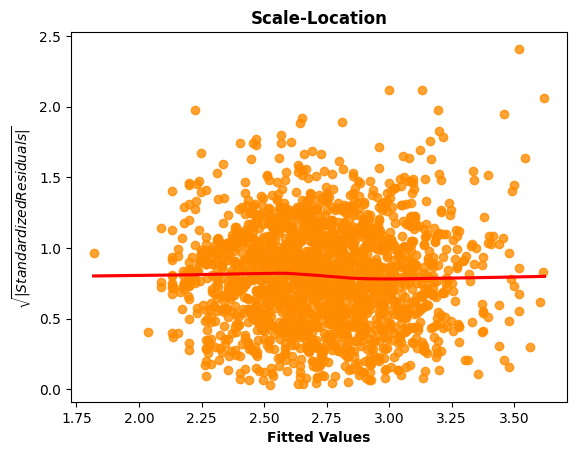

In [88]:
# Scale-Location Plot
resid_standardized = lm.get_influence().resid_studentized_internal

sns.regplot(x=fitted, y=np.sqrt(np.abs(resid_standardized)), color='darkorange',
            ci=None, lowess=True, line_kws={'color': 'red'})
plt.title('Scale-Location', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$', fontweight='bold')
plt.show()

In [89]:
# Generate the Breusch-Pagan test for heteroscedasticity.
bp_test = het_breuschpagan(lm.resid, lm.model.exog)
print("lm:", f"{bp_test[0]:0,.3f}", "lm_pvalue:", f"{bp_test[1]:0,.3f}")

lm: 10.484 lm_pvalue: 0.005


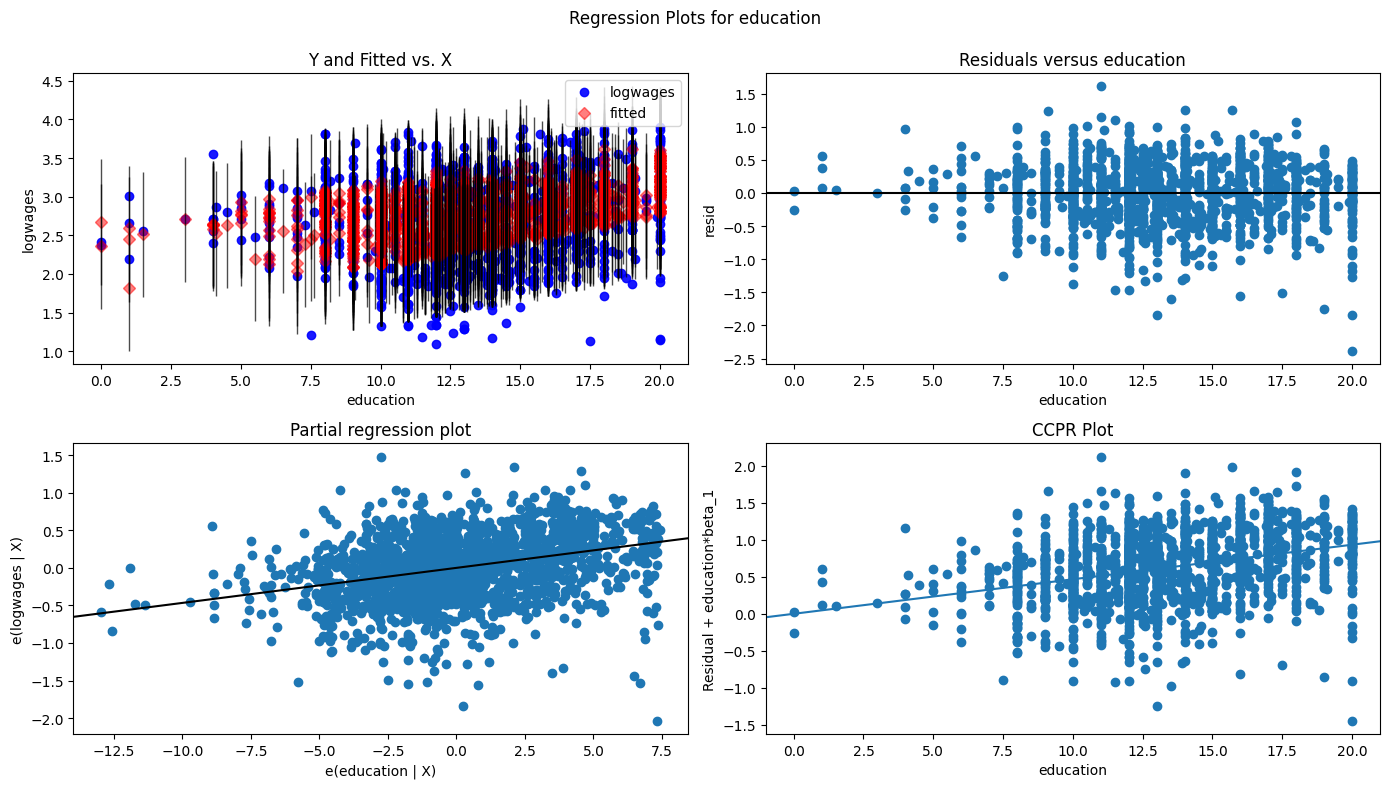

In [90]:
# Display model regression plots for the 'education' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'education',fig=fig)
plt.show()

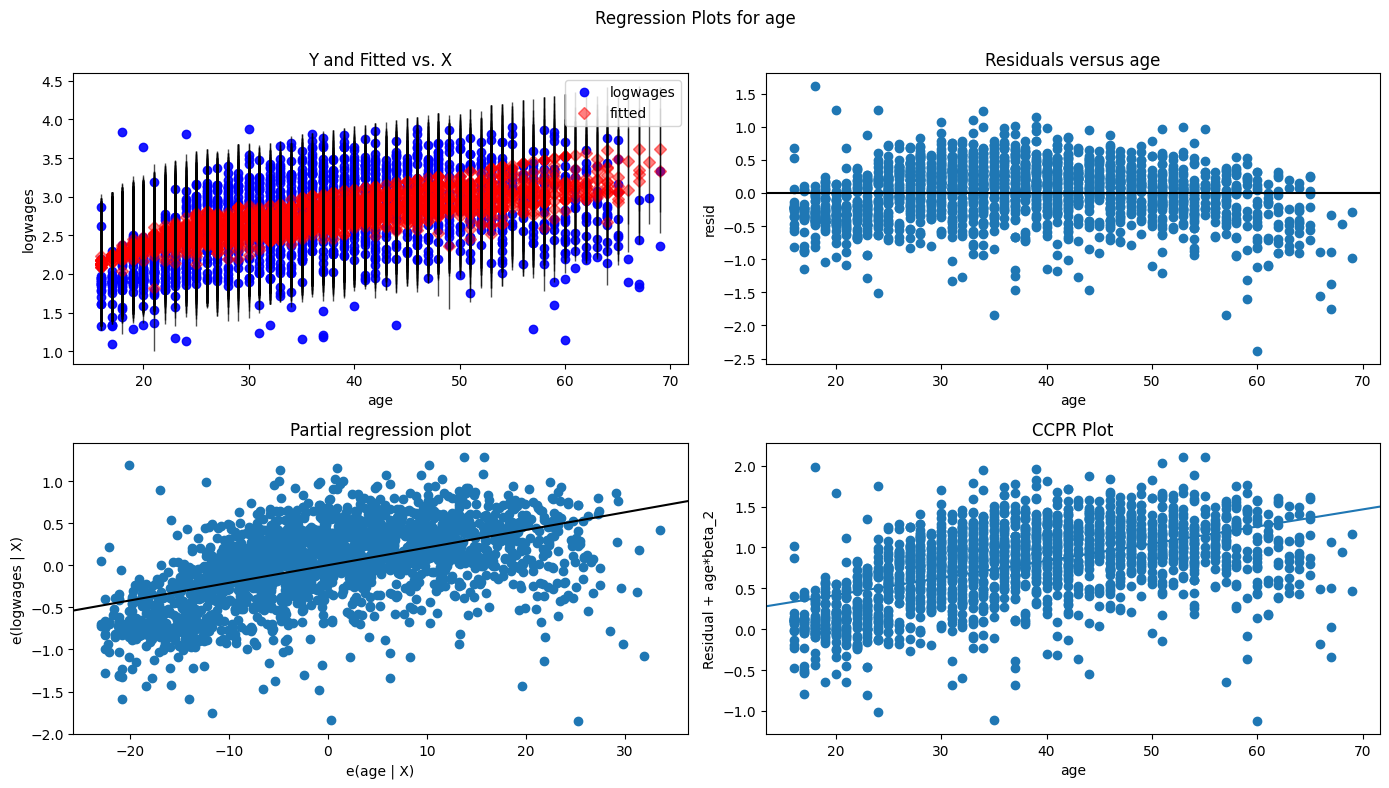

In [91]:
# Display model regression plots for the 'age' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'age',fig=fig)
plt.show()

In [92]:
# Generate required multiple linear regression model for English group.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_english).fit()
# View model coefficients.
print(lm.params)

Intercept    1.182472
education    0.057239
age          0.018098
dtype: float64


In [93]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_english['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 831.404


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     16.48
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.86e-07
Time:                        10:05:14   Log-Likelihood:                -169.36
No. Observations:                 259   AIC:                             344.7
Df Residuals:                     256   BIC:                             355.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6991      0.170     10.018      0.0

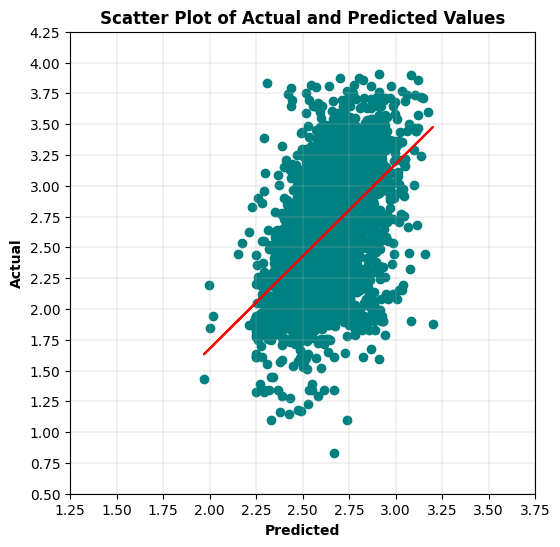

In [96]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_english[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.25,4,step=0.25)) 
plt.yticks(np.arange(0.5,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

In [97]:
# Generate required multiple linear regression model for French group.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_french).fit()
# View model coefficients.
print(lm.params)

Intercept    1.699127
education    0.034713
age          0.012568
dtype: float64


In [98]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_french['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 63.295


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     16.48
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.86e-07
Time:                        10:05:27   Log-Likelihood:                -169.36
No. Observations:                 259   AIC:                             344.7
Df Residuals:                     256   BIC:                             355.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6991      0.170     10.018      0.0

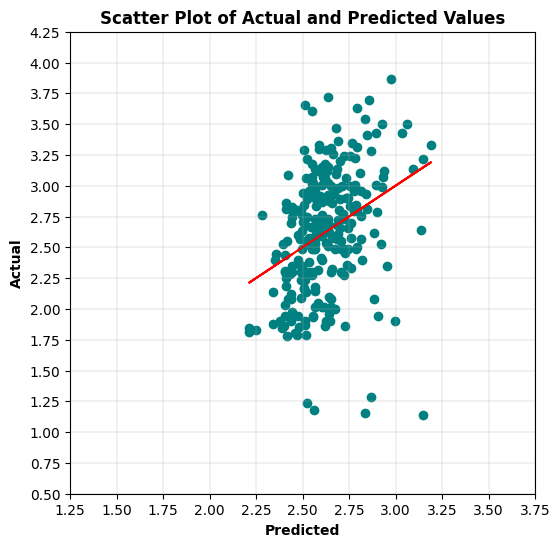

In [99]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_french[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.25,4,step=0.25)) 
plt.yticks(np.arange(0.5,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

In [100]:
# Generate required multiple linear regression model for Other group.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_other).fit()
# View model coefficients.
print(lm.params)

Intercept    1.324193
education    0.049325
age          0.017283
dtype: float64


In [101]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_other['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 114.817


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     91.64
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.91e-34
Time:                        10:05:43   Log-Likelihood:                -260.46
No. Observations:                 484   AIC:                             526.9
Df Residuals:                     481   BIC:                             539.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3242      0.100     13.276      0.0

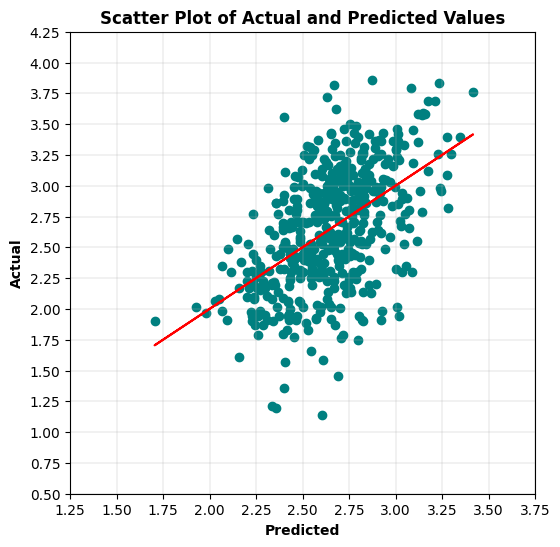

In [102]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_other[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.25,4,step=0.25)) 
plt.yticks(np.arange(0.5,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

5c. After reviewing the question semantically, and thinking about what the professor had mentioned, I suspected that he may have wanted to see  
a MLR model estimating logarithmically converted wages with age and education variables for each grouped combination of the sex and language 
values.

In [103]:
# Create individual dataframes associated with each grouped combination of sex and language values.
Wages_f_english = Wages_female[Wages_female.language == 'English']
Wages_f_french = Wages_female[Wages_female.language == 'French']
Wages_f_other = Wages_female[Wages_female.language == 'Other']
Wages_m_english = Wages_male[Wages_male.language == 'English']
Wages_m_french = Wages_male[Wages_male.language == 'French']
Wages_m_other = Wages_male[Wages_male.language == 'Other']

In [104]:
# Generate required multiple linear regression model for the Female and English group.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_f_english).fit()
# View model coefficients.
print(lm.params)

Intercept    1.064363
education    0.067182
age          0.014537
dtype: float64


In [105]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_f_english['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 394.759


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     270.4
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.61e-102
Time:                        10:06:06   Log-Likelihood:                -924.40
No. Observations:                1636   AIC:                             1855.
Df Residuals:                    1633   BIC:                             1871.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0644      0.064     16.585      0.0

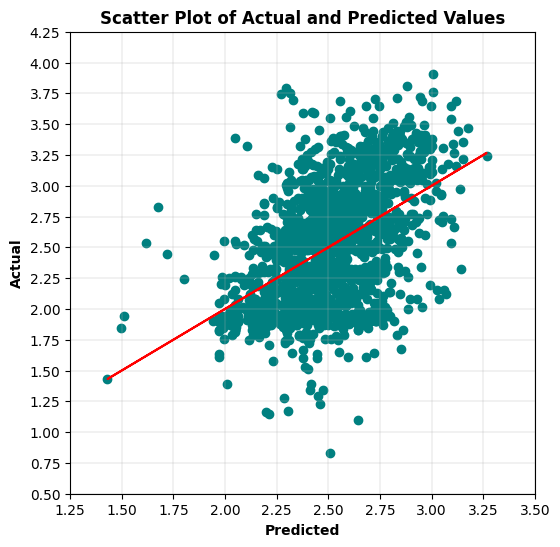

In [106]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_f_english[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.25,3.75,step=0.25)) 
plt.yticks(np.arange(0.5,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

In [107]:
# Generate required multiple linear regression model for the Female and French group.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_f_french).fit()
# View model coefficients.
print(lm.params)

Intercept    1.191763
education    0.063748
age          0.012791
dtype: float64


In [108]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_f_french['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 22.062


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     16.09
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           6.78e-07
Time:                        10:06:23   Log-Likelihood:                -54.008
No. Observations:                 119   AIC:                             114.0
Df Residuals:                     116   BIC:                             122.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1918      0.234      5.101      0.0

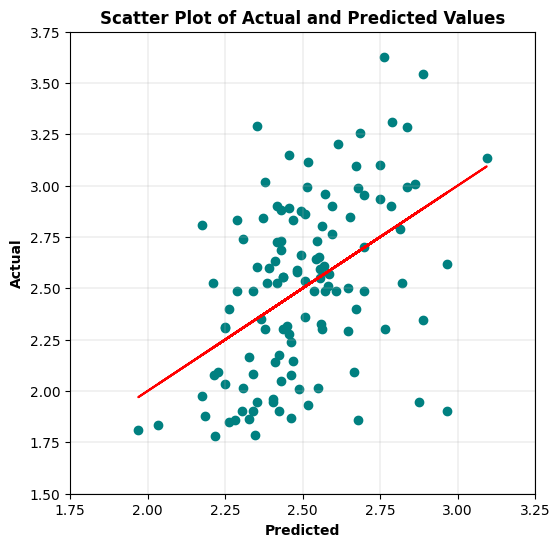

In [109]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_f_french[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.75,3.5,step=0.25)) 
plt.yticks(np.arange(1.5,4,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

In [110]:
# Generate required multiple linear regression model for the Female and Other group.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_f_other).fit()
# View model coefficients.
print(lm.params)

Intercept    1.310070
education    0.056881
age          0.012777
dtype: float64


In [111]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_f_other['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 51.008


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     44.94
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           2.47e-17
Time:                        10:06:39   Log-Likelihood:                -116.82
No. Observations:                 246   AIC:                             239.6
Df Residuals:                     243   BIC:                             250.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3101      0.138      9.509      0.0

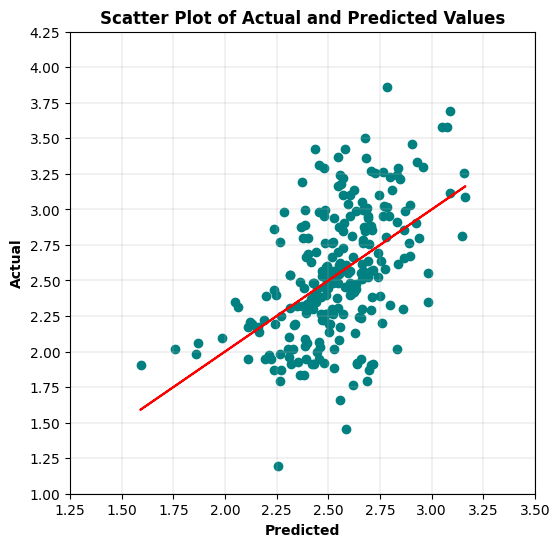

In [112]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_f_other[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.25,3.75,step=0.25)) 
plt.yticks(np.arange(1,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

In [113]:
# Generate required multiple linear regression model for the Male and English group.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_m_english).fit()
# View model coefficients.
print(lm.params)

Intercept    1.255115
education    0.050261
age          0.021827
dtype: float64


In [114]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_m_english['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 396.891


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.03e-149
Time:                        10:06:55   Log-Likelihood:                -813.09
No. Observations:                1608   AIC:                             1632.
Df Residuals:                    1605   BIC:                             1648.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2551      0.057     21.834      0.0

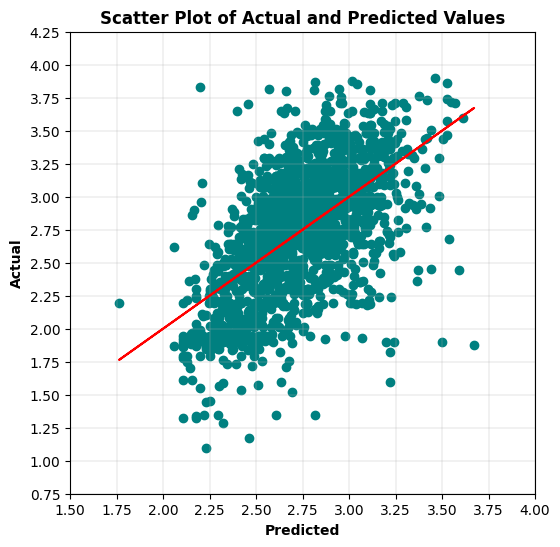

In [115]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_m_english[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.5,4.25,step=0.25)) 
plt.yticks(np.arange(0.75,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

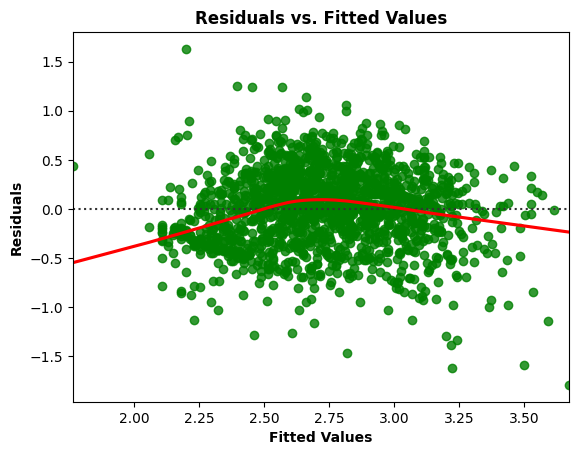

In [116]:
# Display Residuals vs. Fitted values scatter plot.
fitted = lm.fittedvalues
residuals = lm.resid
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'}, color='green') 
plt.title('Residuals vs. Fitted Values', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.show()

In [117]:
# Residuals Anderson-Darling Normality Test
result = anderson(residuals)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.738
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


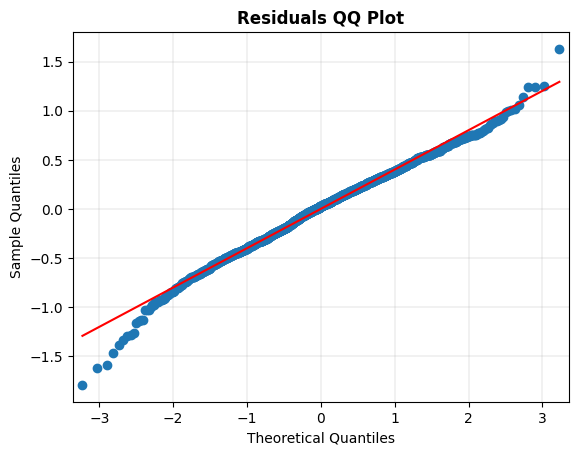

In [118]:
# Residuals QQ Plot
qqplot(residuals, line='s')
plt.title('Residuals QQ Plot', fontweight='bold')
plt.grid(linewidth=0.25)
plt.show()

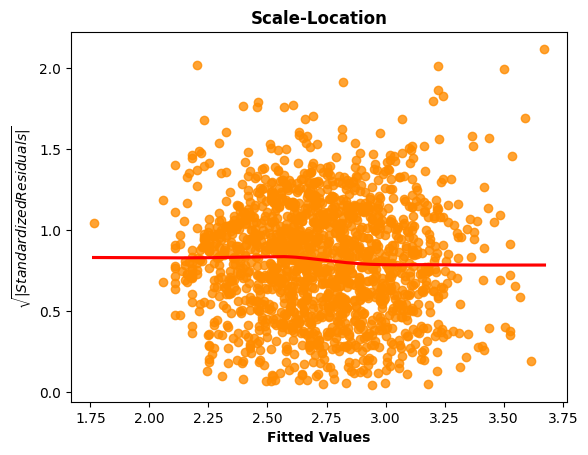

In [119]:
# Scale-Location Plot
resid_standardized = lm.get_influence().resid_studentized_internal

sns.regplot(x=fitted, y=np.sqrt(np.abs(resid_standardized)), color='darkorange',
            ci=None, lowess=True, line_kws={'color': 'red'})
plt.title('Scale-Location', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$', fontweight='bold')
plt.show()

In [120]:
# Generate the Breusch-Pagan test for heteroscedasticity.
bp_test = het_breuschpagan(lm.resid, lm.model.exog)
print("lm:", f"{bp_test[0]:0,.3f}", "lm_pvalue:", f"{bp_test[1]:0,.3f}")

lm: 5.679 lm_pvalue: 0.058


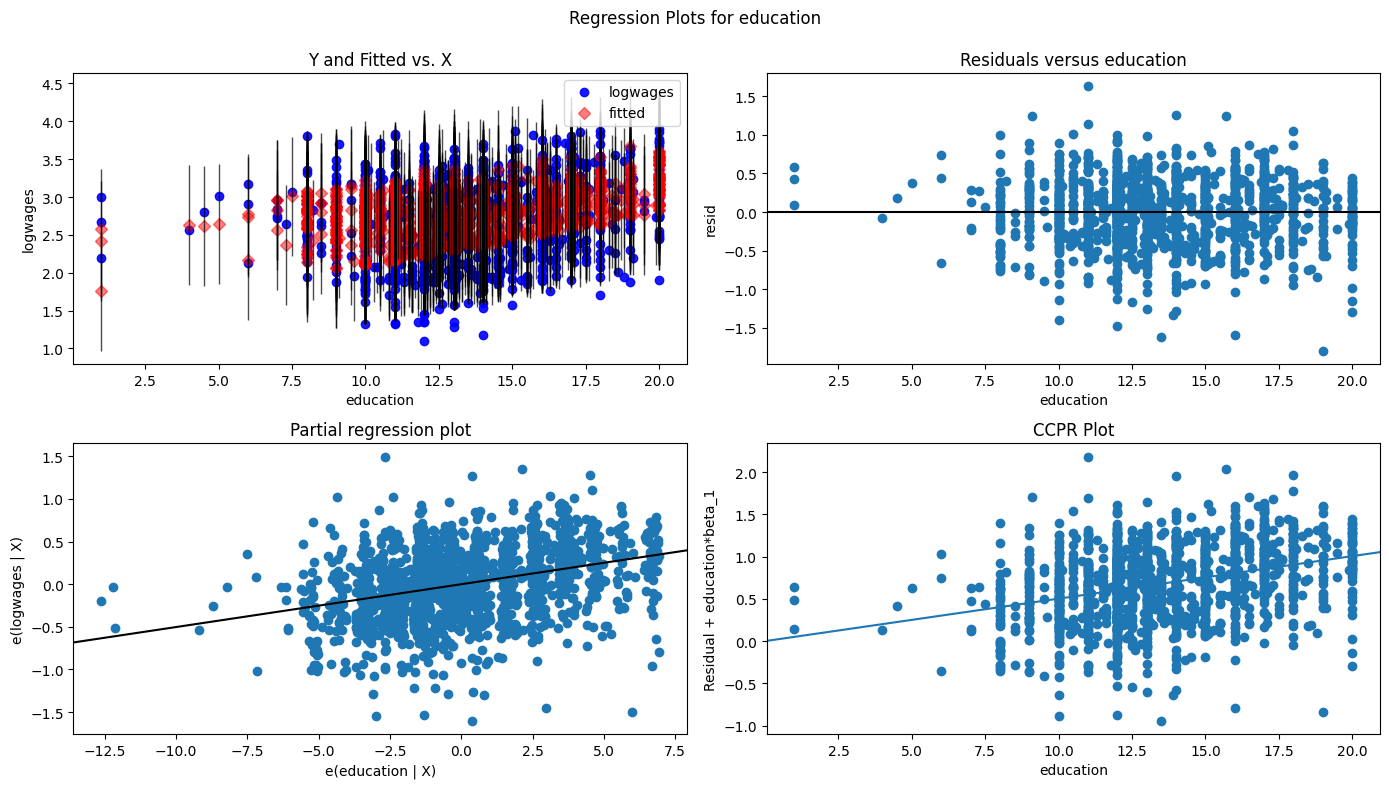

In [121]:
# Display model regression plots for the 'education' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'education',fig=fig)
plt.show()

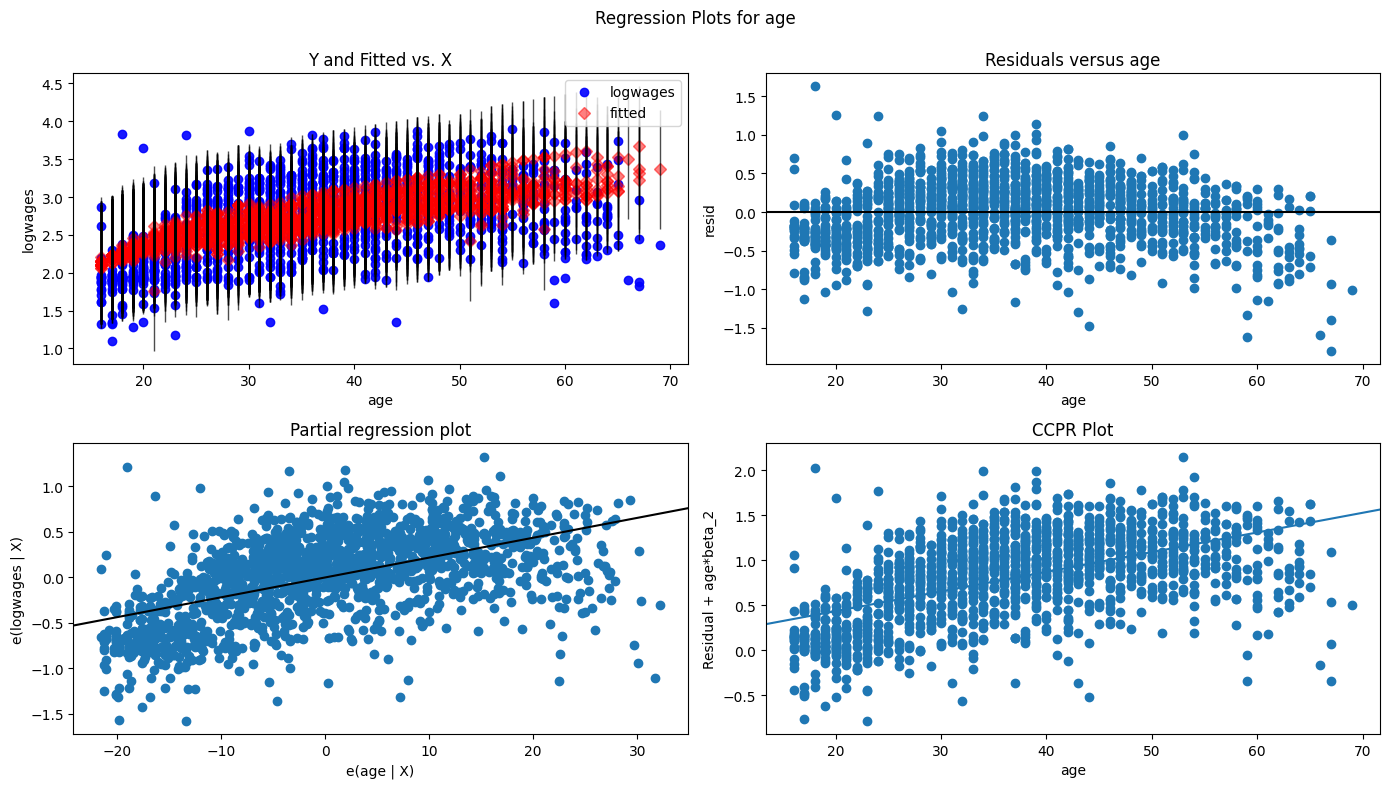

In [122]:
# Display model regression plots for the 'age' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'age',fig=fig)
plt.show()

In [123]:
# Generate required multiple linear regression model for the Male and French group.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_m_french).fit()
# View model coefficients.
print(lm.params)

Intercept    1.983874
education    0.020630
age          0.012507
dtype: float64


In [124]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_m_french['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 37.890


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     6.521
Date:                Sun, 23 Feb 2025   Prob (F-statistic):            0.00197
Time:                        10:07:51   Log-Likelihood:                -100.80
No. Observations:                 140   AIC:                             207.6
Df Residuals:                     137   BIC:                             216.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9839      0.230      8.636      0.0

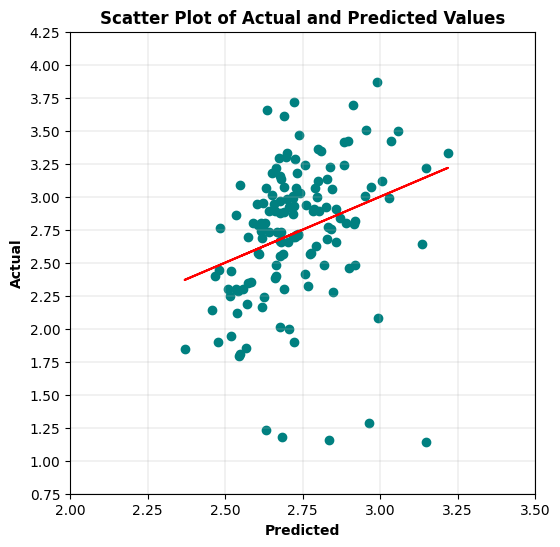

In [125]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_m_french[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(2,3.75,step=0.25)) 
plt.yticks(np.arange(0.75,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

In [126]:
# Generate required multiple linear regression model for the Male and Other group.
# Fit linear regression model.
lm = smf.ols("logwages ~ education + age", data = Wages_m_other).fit()
# View model coefficients.
print(lm.params)

Intercept    1.394755
education    0.042414
age          0.020101
dtype: float64


In [127]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'logwages'.
Y = Wages_m_other['logwages'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 57.983


                            OLS Regression Results                            
Dep. Variable:               logwages   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     55.64
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.65e-20
Time:                        10:08:06   Log-Likelihood:                -123.53
No. Observations:                 238   AIC:                             253.1
Df Residuals:                     235   BIC:                             263.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3948      0.135     10.367      0.0

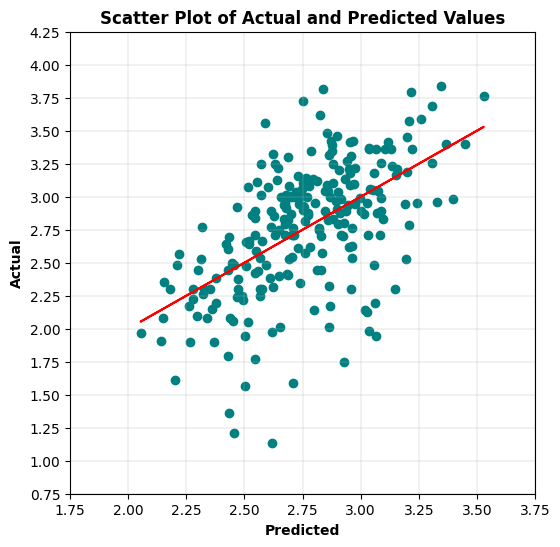

In [128]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,2,3)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=2))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Wages_m_other[['education','age']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.75,4,step=0.25)) 
plt.yticks(np.arange(0.75,4.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

5 Select the grouping variable that creates the best model.  Explain the performance difference (if any) over the previous models.

Multiple OLS regression models were run with logwages as the outcome variable along with education and age as explanatory variables. Two 
MLR models caught my eye. First, Model A had One-Hot Encoded Sex values added to the MLR model, and the second, Model B used the Male and 
English group to generate the MLR model.  Model A used the same number of observations (3,987) as the original, and Model B used far less
observations (1,608). Model B had the best R-square result of 0.348, Model A R-square result was 0.309, and the original model had 0.26 
as a R-square result. The original model had the best F-statistic of 699.4, but Model A had 595 as a F-statistic with an additional degree 
of freedom. All three models had a F-statistic probability near zero, safely under the 0.05 alpha standard (rejecting H0 the null hypothesis), 
indicating clearly that the model relationship between the outcome and explanatory variables is statistically significant. Model A had the 
best t-statistic values for the education and age variables, and solid t-statistic values for the binary sex variables as well. All three
model's t-statistics exceeded the absolute t-critical, and had p-values near zero, safely under the 0.05 alpha standard (rejecting H0 the 
null hypothesis), indicating clearly that their relationships with logwages are statistically significant. 

With logwages having a SST of 1,010.056, Model A outperformed the original model by reducing it 312.565 to a SSR of 697.492, but given Model 
B had far fewer observations, it did not make sense to add it to this comparison. When plotting the residuals and the fitted value, Model A 
depicted very good linearity, the orignal model depicted reasonably good linearity, and Model B depicted was fair at best. Concerning normality
of the residuals, Model B had the best Jarque-Bera test statistic of 48.787, but all three models had a Jarque-Bera probability near zero, safely 
under the 0.05 alpha standard (rejecting H0 the null hypothesis), indicating a lack of normality. Although, Model B's Anderson-Darling result of 
1.738 barely supports that conclusion, and QQ plot rendering shows potentially acceptable normality for all three models. Of the three models, 
only Model B's Scale-Location chart showed a good horizontal progression that indicates potential homoscedasticity in the model, and the 
Breusch-Pagan test statistic of 5.679 and p-value of 0.058, slightly greater than the 0.05 alpha standard (accepting H0 the null hypothesis), 
indicate that some level of homoscedasticity is present in the model.  All three models had a low R squared value, low Log-Likelihood value, and 
high AIC/BIC values basically indicates that the MLR models would not be a good predictor of logwages.

![alt text](Model_Comparison.png)

I guess if had to choose one of the models, it would probably be Model A, which had One-Hot Encoded Sex values added to the model. Merely because 
it uses all the observations and has very good model linearity without sacrificing much otherwise. Was highly tempted to run a transformation on
the education explanatory variable, even though it has some zero values, just to see what that might yield. But ended up making the judgement call
that more variables would be necessary to improve this model enough for any realistic use.

In [129]:
# Load the required data for the second part of assigment.
Fert_df = pd.read_csv(DATA / 'Fertility_UN.csv')

# View some initial records.
Fert_df.head()

Fertility  PPgdp  LogFertility  LogPPgdp
0       6.80     98      1.916923  4.584967
1       2.28   1317      0.824175  7.183112
2       2.80   1784      1.029619  7.486613
3       7.20    739      1.974081  6.605298
4       2.44   7163      0.891998  8.876684

In [130]:
# Generate dataframe dimensions.
Fert_df.shape

(193, 4)

In [131]:
# Generate variable data types.
Fert_df.dtypes

Fertility       float64
PPgdp             int64
LogFertility    float64
LogPPgdp        float64
dtype: object

In [132]:
# Generate number of missing values.
Fert_df.isna().sum()

Fertility       0
PPgdp           0
LogFertility    0
LogPPgdp        0
dtype: int64

Specific Evaluation and Preparation of Dataset Variables

In [133]:
Fert_df.describe().map('{:,.3f}'.format)

Fertility       PPgdp LogFertility LogPPgdp
count   193.000     193.000      193.000  193.000
mean      3.189   6,408.425        1.018    7.620
std       1.717   9,377.946        0.537    1.646
min       1.000      90.000        0.000    4.500
25%       1.890     467.000        0.637    6.146
50%       2.660   1,938.000        0.978    7.569
75%       4.260   7,850.000        1.449    8.968
max       8.000  44,579.000        2.079   10.705

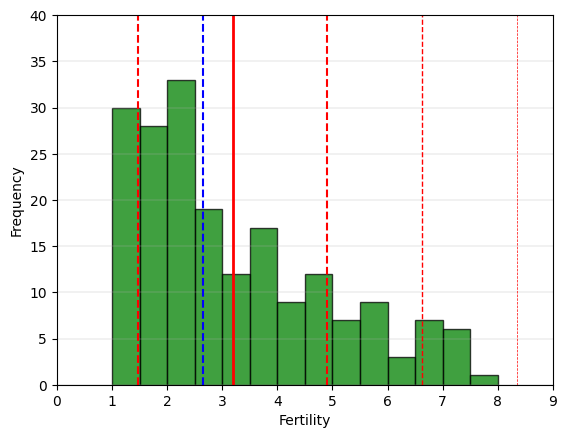

In [154]:
# Histogram for the 'Fertility' continuous variable.
plt.hist(Fert_df['Fertility'], bins = 14, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Fertility')
plt.ylabel('Frequency')
plt.xlim(0, 9)
plt.xticks(np.arange(0,10,step=1))
plt.yticks(np.arange(0,45,step=5))

mean_value = Fert_df['Fertility'].mean()
median_value = Fert_df['Fertility'].median()
std_value = Fert_df['Fertility'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

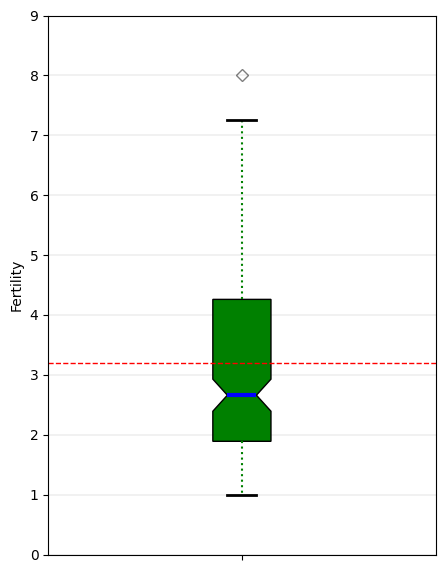

In [142]:
# Boxplot for the 'Fertility' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Fert_df['Fertility'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Fertility')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,10,step=1)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [143]:
# 'Fertility' Anderson-Darling Normality Test
result = anderson(Fert_df['Fertility'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 5.570
15.000: 0.565, data does not look normal (reject H0)
10.000: 0.643, data does not look normal (reject H0)
5.000: 0.772, data does not look normal (reject H0)
2.500: 0.900, data does not look normal (reject H0)
1.000: 1.071, data does not look normal (reject H0)


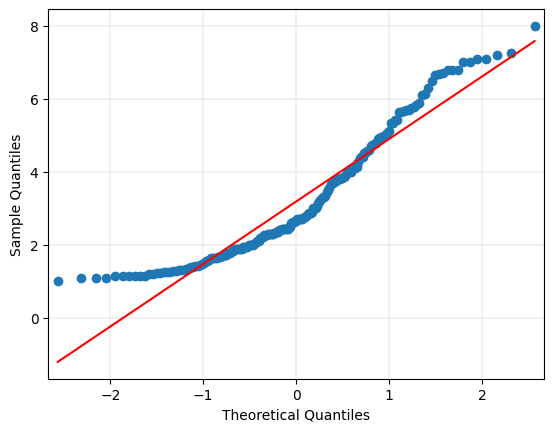

In [144]:
# 'Fertility' QQ plot
qqplot(Fert_df['Fertility'], line='s')
plt.grid(linewidth=0.25)
plt.show()

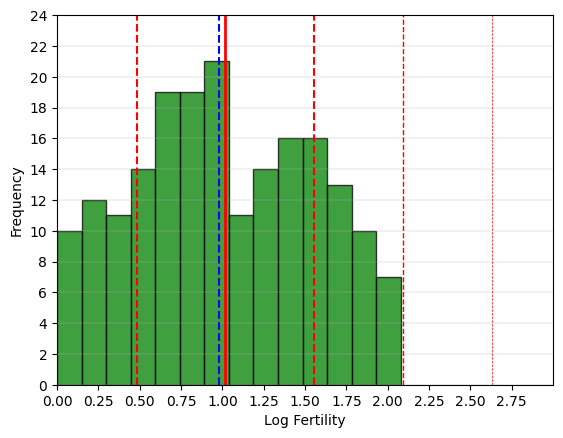

In [160]:
# Histogram for the 'LogFertility' continuous transformed variable.
plt.hist(Fert_df['LogFertility'], bins = 14, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Log Fertility')
plt.ylabel('Frequency')
plt.xlim(0,3)
plt.xticks(np.arange(0,3,step=0.25))
plt.yticks(np.arange(0,26,step=2))
mean_value = Fert_df['LogFertility'].mean()
median_value = Fert_df['LogFertility'].median()
std_value = Fert_df['LogFertility'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

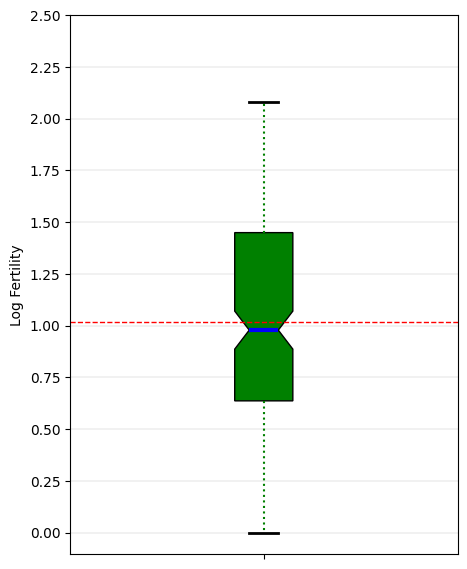

In [162]:
# Boxplot for the 'LogFertility' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Fert_df['LogFertility'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Log Fertility')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,2.75,step=0.25)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [163]:
# 'LogFertility' Anderson-Darling Normality Test
result = anderson(Fert_df['LogFertility'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.362
15.000: 0.565, data does not look normal (reject H0)
10.000: 0.643, data does not look normal (reject H0)
5.000: 0.772, data does not look normal (reject H0)
2.500: 0.900, data does not look normal (reject H0)
1.000: 1.071, data does not look normal (reject H0)


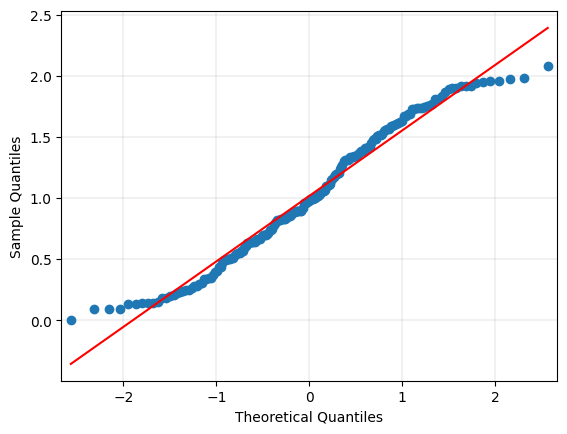

In [164]:
# 'LogFertility' QQ plot
qqplot(Fert_df['LogFertility'], line='s')
plt.grid(linewidth=0.25)
plt.show()

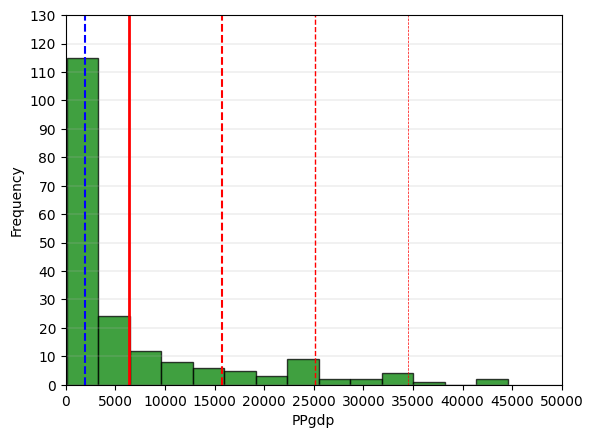

In [169]:
# Histogram for the 'PPgdp' continuous variable.
plt.hist(Fert_df['PPgdp'], bins = 14, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('PPgdp')
plt.ylabel('Frequency')
plt.xlim(0, 9)
plt.xticks(np.arange(0,50001,step=5000))
plt.yticks(np.arange(0,140,step=10))

mean_value = Fert_df['PPgdp'].mean()
median_value = Fert_df['PPgdp'].median()
std_value = Fert_df['PPgdp'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

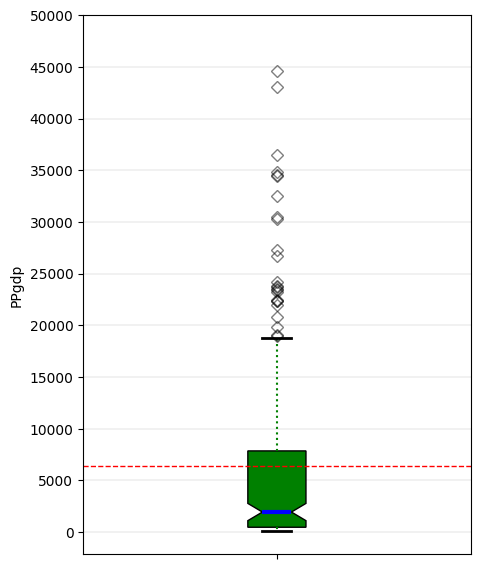

In [170]:
# Boxplot for the 'PPgdp' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Fert_df['PPgdp'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('PPgdp')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,50001,step=5000)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [171]:
# 'PPgdp' Anderson-Darling Normality Test
result = anderson(Fert_df['PPgdp'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 22.292
15.000: 0.565, data does not look normal (reject H0)
10.000: 0.643, data does not look normal (reject H0)
5.000: 0.772, data does not look normal (reject H0)
2.500: 0.900, data does not look normal (reject H0)
1.000: 1.071, data does not look normal (reject H0)


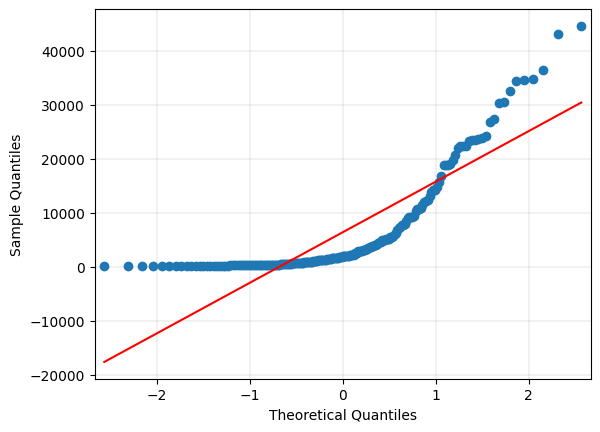

In [172]:
# 'PPgdp' QQ plot
qqplot(Fert_df['PPgdp'], line='s')
plt.grid(linewidth=0.25)
plt.show()

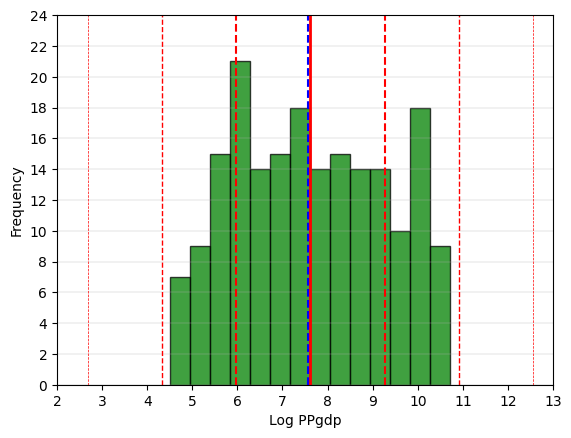

In [176]:
# Histogram for the 'LogPPgdp' continuous transformed variable.
plt.hist(Fert_df['LogPPgdp'], bins = 14, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Log PPgdp')
plt.ylabel('Frequency')
plt.xlim(2,12)
plt.xticks(np.arange(2,14,step=1))
plt.yticks(np.arange(0,26,step=2))
mean_value = Fert_df['LogPPgdp'].mean()
median_value = Fert_df['LogPPgdp'].median()
std_value = Fert_df['LogPPgdp'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

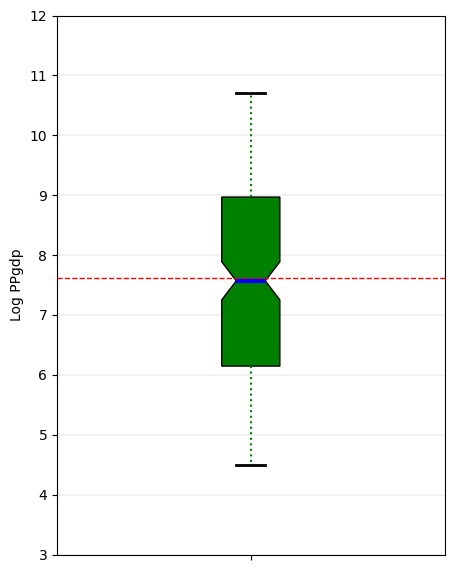

In [178]:
# Boxplot for the 'LogPPgdp' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Fert_df['LogPPgdp'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Log PPgdp')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(3,13,step=1)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [179]:
# 'LogPPgdp' Anderson-Darling Normality Test
result = anderson(Fert_df['LogPPgdp'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.738
15.000: 0.565, data does not look normal (reject H0)
10.000: 0.643, data does not look normal (reject H0)
5.000: 0.772, data does not look normal (reject H0)
2.500: 0.900, data does not look normal (reject H0)
1.000: 1.071, data does not look normal (reject H0)


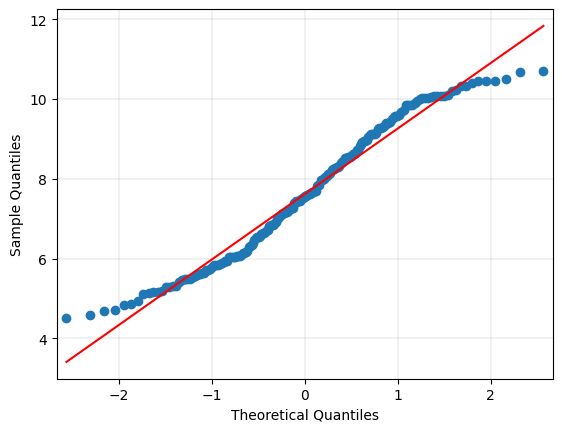

In [180]:
# 'LogPPgdp' QQ plot
qqplot(Fert_df['LogPPgdp'], line='s')
plt.grid(linewidth=0.25)
plt.show()

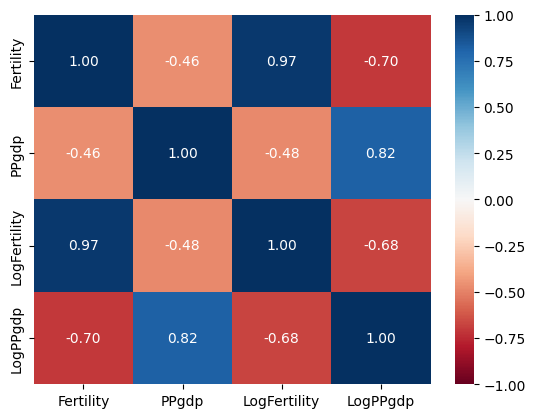

In [181]:
# Generate heatmap for correlation matrix analysis.
corr = Fert_df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
plt.show()

6.  The data for the UN study on fertility contains GDP and fertility rates for 193 nations.  It also contains log transforms for
both variables.  Generate two scatter plots of PPgdp vs. Fertility, one using linear scaling for both variables and the other using
log scaling for both variables.

    a. Perform regressions using both log and linear transformations of the data.
    b. Which regression exhibits a better fit (log or linear)? Use the ANOVA summary to support your reasoning.

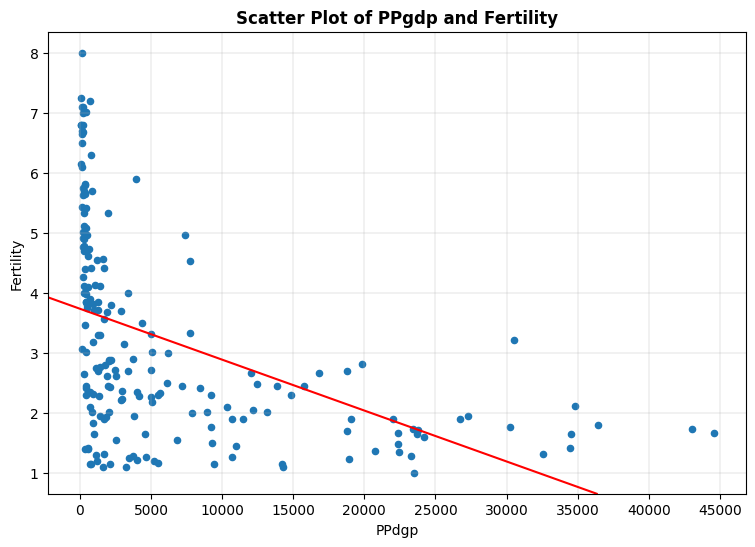

In [186]:
# Generate a scatter plot for the continuous variables 'PPgdp' and 'Fertility'.
ax = Fert_df.plot.scatter('PPgdp',
                'Fertility',
                grid=True,
                figsize=(9,6))

ax.set_title('Scatter Plot of PPgdp and Fertility',
             weight='bold')
ax.set_xlabel('PPdgp')
ax.set_ylabel('Fertility')

plt.xticks(np.arange(0,45001,step=5000)) 
plt.yticks(np.arange(0,9,step=1)) 
plt.grid(linewidth=0.25)

X = Fert_df['PPgdp'].tolist()
Y = Fert_df['Fertility'].tolist()

m, b = np.polyfit(X, Y, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r')

plt.show()

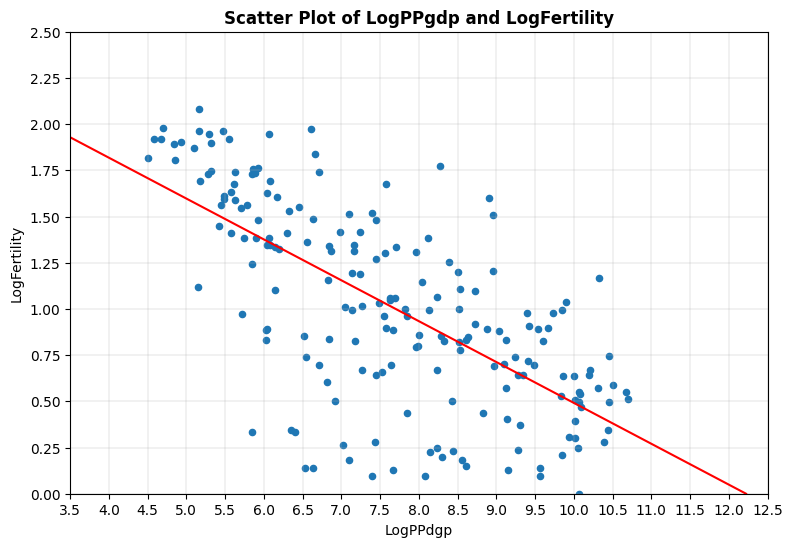

In [ ]:
# Generate a scatter plot for the continuous variables 'LogPPgdp' and 'LogFertility'.
ax = Fert_df.plot.scatter('LogPPgdp',
                'LogFertility',
                grid=True,
                figsize=(9,6))

ax.set_title('Scatter Plot of LogPPgdp and LogFertility',
             weight='bold')
ax.set_xlabel('LogPPdgp')
ax.set_ylabel('LogFertility')

plt.xlim(3.5,12.5)
plt.xticks(np.arange(3.5,13,step=0.5)) 
plt.ylim(0,2.50)
plt.yticks(np.arange(0,2.75,step=0.25)) 
plt.grid(linewidth=0.25)

X = Fert_df['LogPPgdp'].tolist()
Y = Fert_df['LogFertility'].tolist()

m, b = np.polyfit(X, Y, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r')

plt.show()

6a. Perform regressions using both log and linear transformations of the data.

In [204]:
# Generate required linear regression model for 'Fertility' outcome variable and 'PPgdp' explanatory variable.
# Fit linear regression model.
lm = smf.ols("Fertility ~ PPgdp", data = Fert_df).fit()
# View model coefficients.
print(lm.params)

Intercept    3.733282
PPgdp       -0.000085
dtype: float64


In [205]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'Fertility'.
Y = Fert_df['Fertility'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 566.292


                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     52.22
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.15e-11
Time:                        12:32:16   Log-Likelihood:                -354.41
No. Observations:                 193   AIC:                             712.8
Df Residuals:                     191   BIC:                             719.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7333      0.133     28.040      0.0

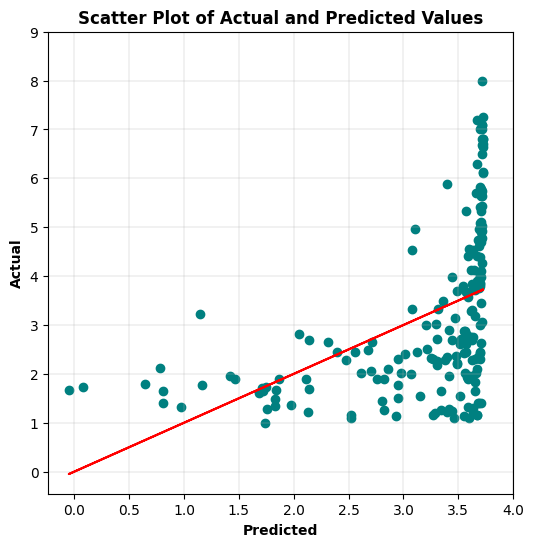

In [213]:
# Generate OLS Regression results for the linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,1,2)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=1))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Fert_df[['PPgdp']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, deg=1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(0,4.5,step=0.5)) 
plt.yticks(np.arange(0,10,step=1)) 
plt.grid(linewidth=0.25)
plt.show()

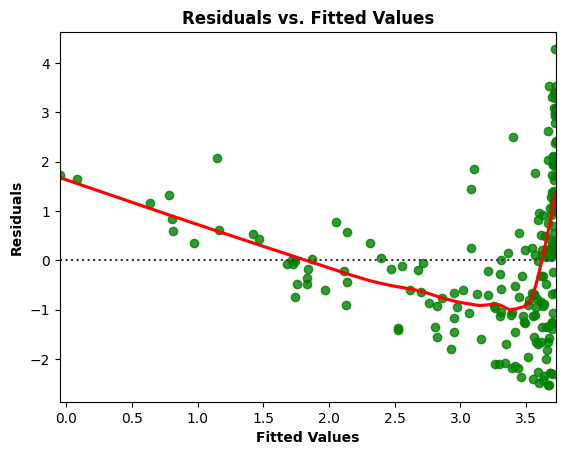

In [214]:
# Display Residuals vs. Fitted values scatter plot.
fitted = lm.fittedvalues
residuals = lm.resid
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'}, color='green') 
plt.title('Residuals vs. Fitted Values', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.show()

In [215]:
# Residuals Anderson-Darling Normality Test
result = anderson(residuals)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.714
15.000: 0.565, data does not look normal (reject H0)
10.000: 0.643, data does not look normal (reject H0)
5.000: 0.772, data does not look normal (reject H0)
2.500: 0.900, data does not look normal (reject H0)
1.000: 1.071, data does not look normal (reject H0)


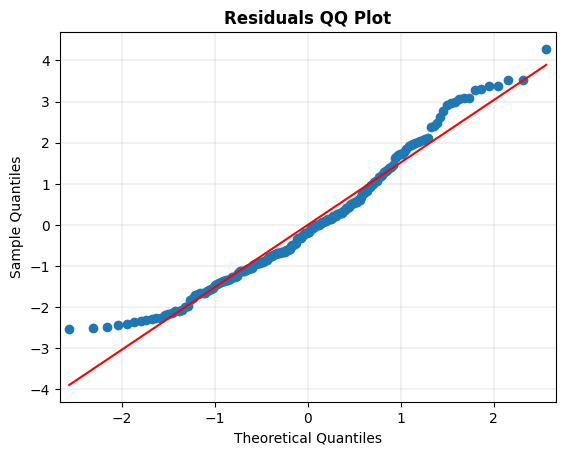

In [216]:
# Residuals QQ Plot
qqplot(residuals, line='s')
plt.title('Residuals QQ Plot', fontweight='bold')
plt.grid(linewidth=0.25)
plt.show()

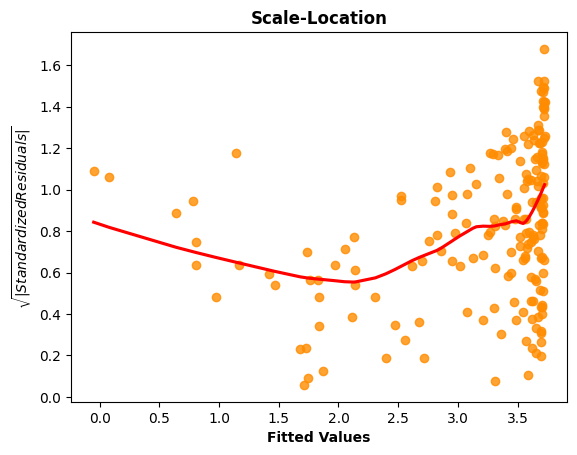

In [217]:
# Scale-Location Plot
resid_standardized = lm.get_influence().resid_studentized_internal

sns.regplot(x=fitted, y=np.sqrt(np.abs(resid_standardized)), color='darkorange',
            ci=None, lowess=True, line_kws={'color': 'red'})
plt.title('Scale-Location', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$', fontweight='bold')
plt.show()

In [218]:
# Generate the Breusch-Pagan test for heteroscedasticity.
bp_test = het_breuschpagan(lm.resid, lm.model.exog)
print("lm:", f"{bp_test[0]:0,.3f}", "lm_pvalue:", f"{bp_test[1]:0,.3f}")

lm: 14.641 lm_pvalue: 0.000


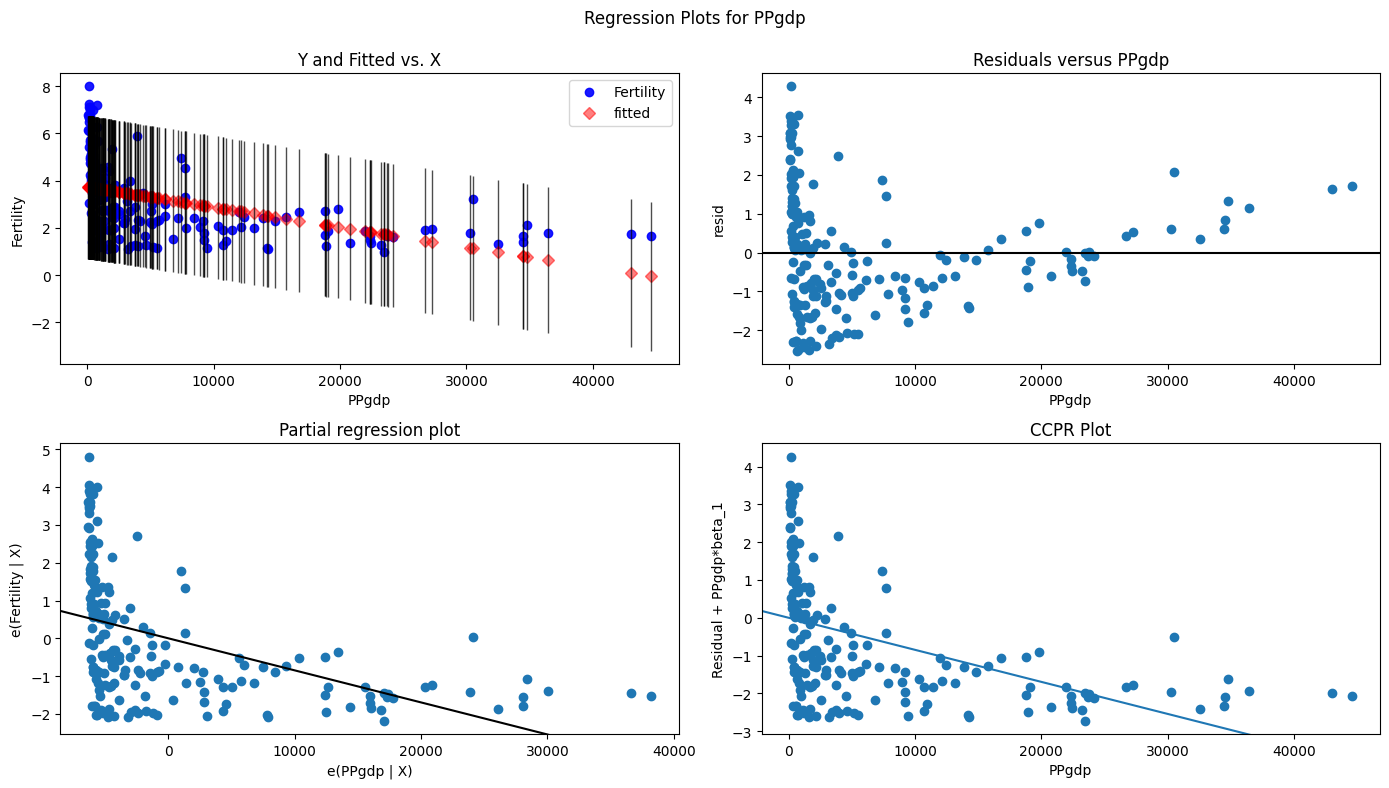

In [219]:
# Display model regression plots for the 'PPgdp' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'PPgdp',fig=fig)
plt.show()

In [220]:
# Generate required linear regression model for 'LogFertility' outcome variable and 'LogPPgdp' explanatory variable.
# Fit linear regression model.
lm = smf.ols("LogFertility ~ LogPPgdp", data = Fert_df).fit()
# View model coefficients.
print(lm.params)

Intercept    2.703218
LogPPgdp    -0.221160
dtype: float64


In [221]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'LogFertility'.
Y = Fert_df['LogFertility'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 55.432


                            OLS Regression Results                            
Dep. Variable:           LogFertility   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           2.73e-27
Time:                        12:46:35   Log-Likelihood:                -94.158
No. Observations:                 193   AIC:                             192.3
Df Residuals:                     191   BIC:                             198.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7032      0.135     19.968      0.0

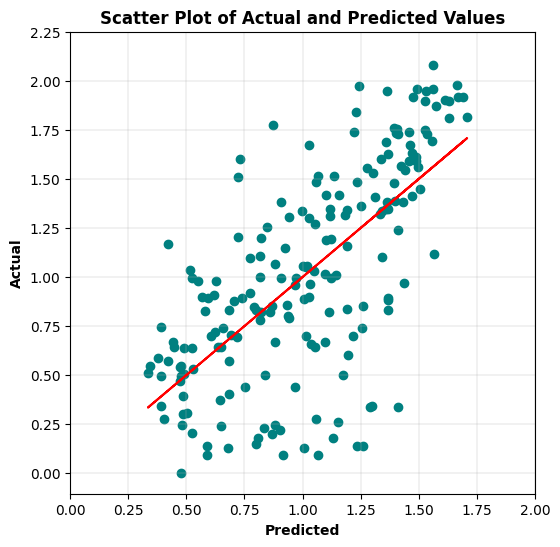

In [224]:
# Generate OLS Regression results for the linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,1,2)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=1))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
X = Fert_df[['LogPPgdp']]
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, deg=1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(0,2.25,step=0.25)) 
plt.yticks(np.arange(0,2.5,step=0.25)) 
plt.grid(linewidth=0.25)
plt.show()

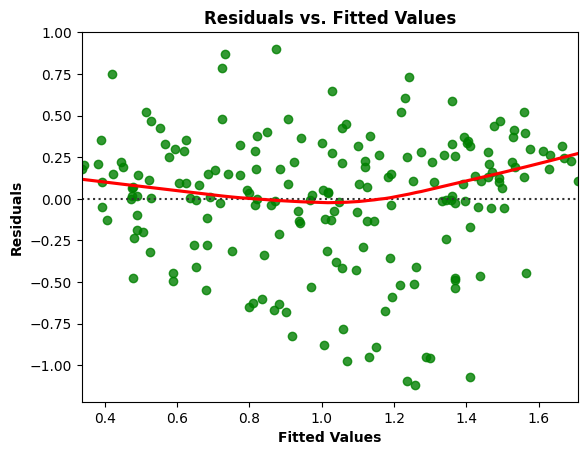

In [225]:
# Display Residuals vs. Fitted values scatter plot.
fitted = lm.fittedvalues
residuals = lm.resid
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'}, color='green') 
plt.title('Residuals vs. Fitted Values', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.show()

In [226]:
# Residuals Anderson-Darling Normality Test
result = anderson(residuals)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.206
15.000: 0.565, data does not look normal (reject H0)
10.000: 0.643, data does not look normal (reject H0)
5.000: 0.772, data does not look normal (reject H0)
2.500: 0.900, data does not look normal (reject H0)
1.000: 1.071, data does not look normal (reject H0)


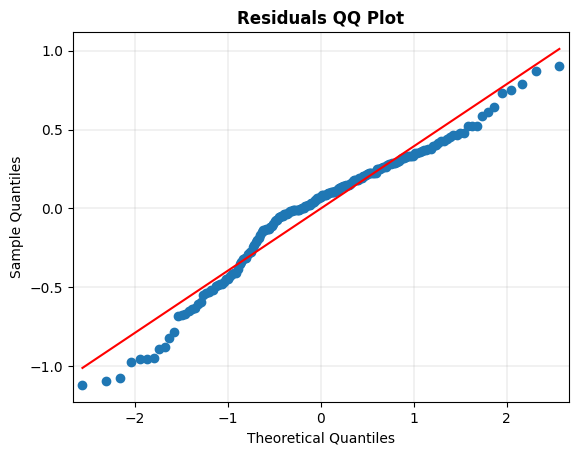

In [227]:
# Residuals QQ Plot
qqplot(residuals, line='s')
plt.title('Residuals QQ Plot', fontweight='bold')
plt.grid(linewidth=0.25)
plt.show()

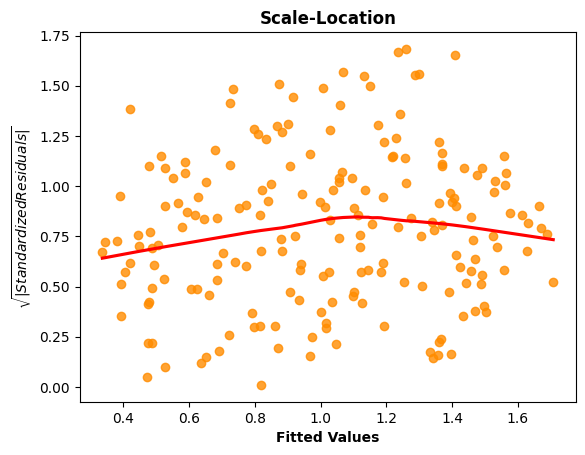

In [228]:
# Scale-Location Plot
resid_standardized = lm.get_influence().resid_studentized_internal

sns.regplot(x=fitted, y=np.sqrt(np.abs(resid_standardized)), color='darkorange',
            ci=None, lowess=True, line_kws={'color': 'red'})
plt.title('Scale-Location', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$', fontweight='bold')
plt.show()

In [229]:
# Generate the Breusch-Pagan test for heteroscedasticity.
bp_test = het_breuschpagan(lm.resid, lm.model.exog)
print("lm:", f"{bp_test[0]:0,.3f}", "lm_pvalue:", f"{bp_test[1]:0,.3f}")

lm: 1.211 lm_pvalue: 0.271


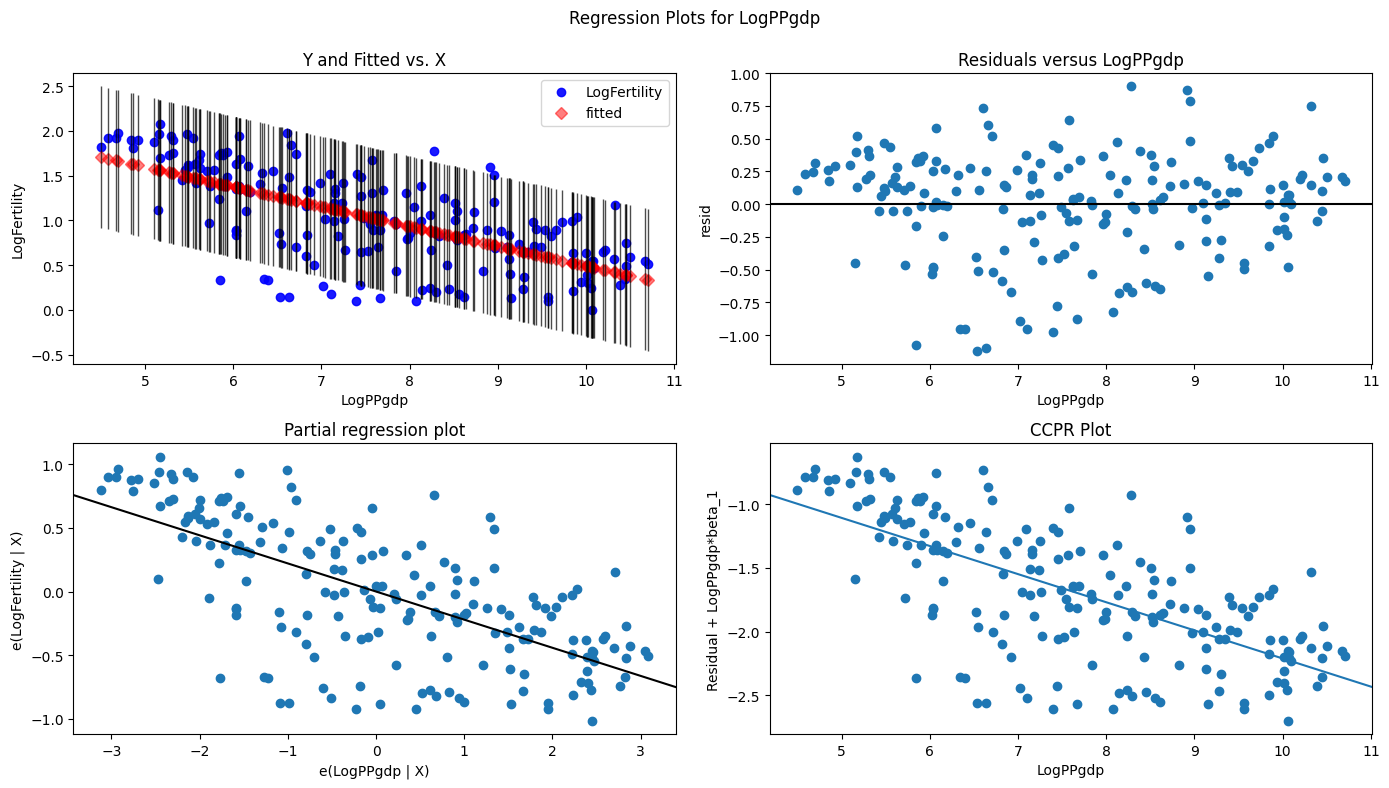

In [230]:
# Display model regression plots for the 'LogPPgdp' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'LogPPgdp',fig=fig)
plt.show()

6b. Which regression exhibits a better fit (log or linear)? Use the ANOVA summary to support your reasoning.

The logarithmic data yielded a significantly better regression model result. The log data regression model had the better R-square result of 0.459, 
while the linear data regression model had a 0.215 R-square result. The log data regression model had the better F-statistic of 162.1, while 
the linear data regression model had a 52.22 F-statistic. Both models had a F-statistic probability near zero, safely under the 0.05 alpha standard 
(rejecting H0 the null hypothesis), indicating that the model relationship between the outcome and explanatory variable is statistically significant.  
Only the log data regression model had a t-statistic value that exceeded the absolute t-critical, but both models had p-values near zero, safely 
under the 0.05 alpha standard (rejecting H0 the null hypothesis), indicating that their relationships with the outcome variable (LogFertility or 
Fertility) were statistically significant. 

It did not make sense to add a SST comparison. When plotting the residuals and the fitted value, the log data regression model showed some linearity,
while the linear data regression model showed no linearity. Concerning normality of the residuals, the linear data regression model had the better 
Jarque-Bera test statistic of 10.371, while the log data regression model had a 16.598 Jarque-Bera test statistic. Both models had a Jarque-Bera 
probability near zero, safely under the 0.05 alpha standard (rejecting H0 the null hypothesis), indicating a lack of normality. The linear data 
regression model had an Anderson-Darling result of 1.714, while the log data regression model had a 3.206 Anderson-Darling result, somewhat supporting 
that conclusion. Although, the QQ plot renderings showed potentially acceptable normality for both models. The Scale-Location chart for the log data 
regression model showed a reasonably horizontal progression that indicates potential homoscedasticity in the model, while the linear data regression 
model clearly showed heteroscedasticity. The log data regression model had a Breusch-Pagan test statistic of 1.211 and p-value of 0.271, greater than 
the 0.05 alpha standard (accepting H0 the null hypothesis), indicating that some level of homoscedasticity is present in the model. 